## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Combine the data into a single dataset


In [4]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results,
                                how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Display the data table for preview


In [5]:
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## The number of mice is **249**.

In [6]:
# Checking the number of mice.
mouse_study["Mouse ID"].nunique()

249

In [7]:
mouse_study# 1892 ROWS OF VALUES, 1 HEADER ROW

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
mouse_study.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   2
a203      Infubinol     Female  20          23          0          45.000000           0                   1
q597      Ramicane      Male    20          25          40         44.471821           2                   1
q633      Zoniferol     Male    12          25          10         49.001866           0                   1
                                                        5          47.183802           0                   1
                                                                                                          ..
i177      Ramicane      Male    10          18          45         33.562402           3                   1
                                                        40         35.557933           2                   1
                        

## The duplicate mouse ID number is **g989**.

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# mouse_study.drop_duplicates(subset=["Mouse ID"], keep='last')#DID NOT WORK!
# mouse_study.drop_duplicates()#DID NOT WORK!



In [10]:
mouse_study.drop_duplicates(keep='last')#DID NOT WORK!

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
mouse_study.value_counts()#DUPLICATE SHOWS UP HERE FIRST!

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   2
a203      Infubinol     Female  20          23          0          45.000000           0                   1
q597      Ramicane      Male    20          25          40         44.471821           2                   1
q633      Zoniferol     Male    12          25          10         49.001866           0                   1
                                                        5          47.183802           0                   1
                                                                                                          ..
i177      Ramicane      Male    10          18          45         33.562402           3                   1
                                                        40         35.557933           2                   1
                        

In [12]:
mouse_dup = mouse_study.groupby(["Mouse ID"])["Timepoint"].count()
mouse_dup

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Timepoint, Length: 249, dtype: int64

In [13]:
# mouse_duplicate = mouse_study.loc[(mouse_study["Mouse ID"].value_counts()), :]#DID NOT HELP!
# mouse_duplicate

In [14]:
# mouse_study["Timepoint"].value_counts()#DID NOT HELP!

In [15]:
mouse_study["Mouse ID"].value_counts()# THIS IS WHERE DUPLICATE WAS FOUND!

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [16]:
mouse_study["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

In [17]:
mouse_study["Drug Regimen"].nunique()

10

## All the data for the duplicate mouse ID **g989**.



In [18]:
mouse_study.loc[mouse_study["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


## Steps taken to create a clean DataFrame.

### After seeing the duplicate Timepoints for mouse ID **g989**, I decided to remove those duplicates and keep the latest Timepoint with the greatest Tumor Volume.

### There appeared to still be viable data associated with mouse ID g989.  Rather than drop that mouse ID, I tried to keep the rest of the data.

### I felt keeping the largest tumor volume at the latest timepoint erred on the conservative side.

In [19]:
# mouse_id = mouse_duplicate.drop_duplicates()#DID NOT WORK!
# mouse_id

In [20]:
# Groupby and sort by max so largest tumor volume can be kept while dropping the other duplicates
mouse_unique = mouse_study.groupby(["Mouse ID", "Drug Regimen", "Sex", "Age_months",
                                    "Weight (g)", "Timepoint",
                                   "Metastatic Sites"], as_index=False)["Tumor Volume (mm3)"].max()
mouse_unique

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
0,a203,Infubinol,Female,20,23,0,0,45.000000
1,a203,Infubinol,Female,20,23,5,0,48.508468
2,a203,Infubinol,Female,20,23,10,1,51.852437
3,a203,Infubinol,Female,20,23,15,1,52.777870
4,a203,Infubinol,Female,20,23,20,1,55.173336
...,...,...,...,...,...,...,...,...
1884,z969,Naftisol,Male,9,30,25,2,63.145652
1885,z969,Naftisol,Male,9,30,30,3,65.841013
1886,z969,Naftisol,Male,9,30,35,4,69.176246
1887,z969,Naftisol,Male,9,30,40,4,70.314904


In [21]:
mouse_unique.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Metastatic Sites        int64
Tumor Volume (mm3)    float64
dtype: object

## Optional: Get all the data for the duplicate mouse ID.


In [22]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_unique.loc[mouse_unique["Mouse ID"]=="g989"]# DUPLICATE Timepoint = 15 (9 ROWS FOR g989)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
586,g989,Propriva,Female,21,26,0,0,45.000000
587,g989,Propriva,Female,21,26,5,0,48.786801
588,g989,Propriva,Female,21,26,10,0,51.745156
589,g989,Propriva,Female,21,26,15,0,53.442020
590,g989,Propriva,Female,21,26,15,1,51.325852
591,g989,Propriva,Female,21,26,20,1,55.326122
592,g989,Propriva,Female,21,26,25,1,56.045564
593,g989,Propriva,Female,21,26,30,1,59.082294
594,g989,Propriva,Female,21,26,35,2,62.570880


In [23]:
mouse_unique = mouse_unique.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first')
mouse_unique

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
0,a203,Infubinol,Female,20,23,0,0,45.000000
1,a203,Infubinol,Female,20,23,5,0,48.508468
2,a203,Infubinol,Female,20,23,10,1,51.852437
3,a203,Infubinol,Female,20,23,15,1,52.777870
4,a203,Infubinol,Female,20,23,20,1,55.173336
...,...,...,...,...,...,...,...,...
1884,z969,Naftisol,Male,9,30,25,2,63.145652
1885,z969,Naftisol,Male,9,30,30,3,65.841013
1886,z969,Naftisol,Male,9,30,35,4,69.176246
1887,z969,Naftisol,Male,9,30,40,4,70.314904


In [24]:
mouse_unique.loc[mouse_unique["Mouse ID"]=="g989"]#DUPLICATE GONE FOR g989 (8 ROWS NOW)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
586,g989,Propriva,Female,21,26,0,0,45.000000
587,g989,Propriva,Female,21,26,5,0,48.786801
588,g989,Propriva,Female,21,26,10,0,51.745156
589,g989,Propriva,Female,21,26,15,0,53.442020
591,g989,Propriva,Female,21,26,20,1,55.326122
592,g989,Propriva,Female,21,26,25,1,56.045564
593,g989,Propriva,Female,21,26,30,1,59.082294
594,g989,Propriva,Female,21,26,35,2,62.570880


In [25]:
mouse_unique.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Metastatic Sites  Tumor Volume (mm3)
a203      Infubinol     Female  20          23          0          0                 45.000000             1
q597      Ramicane      Male    20          25          40         2                 44.471821             1
q633      Zoniferol     Male    12          25          10         0                 49.001866             1
                                                        5          0                 47.183802             1
                                                        0          0                 45.000000             1
                                                                                                          ..
i334      Ramicane      Female  8           20          5          0                 41.020518             1
                                                        0          0                 45.000000             1
i177      Ramicane      

In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# cleanded DataFrame by dropping duplicate Timepoint for Mouse ID = g989 and keeping the greatest tumor volume 
mouse_unique


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
0,a203,Infubinol,Female,20,23,0,0,45.000000
1,a203,Infubinol,Female,20,23,5,0,48.508468
2,a203,Infubinol,Female,20,23,10,1,51.852437
3,a203,Infubinol,Female,20,23,15,1,52.777870
4,a203,Infubinol,Female,20,23,20,1,55.173336
...,...,...,...,...,...,...,...,...
1884,z969,Naftisol,Male,9,30,25,2,63.145652
1885,z969,Naftisol,Male,9,30,30,3,65.841013
1886,z969,Naftisol,Male,9,30,35,4,69.176246
1887,z969,Naftisol,Male,9,30,40,4,70.314904


In [27]:
# Checking the number of mice in the clean DataFrame.
mouse_unique.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Metastatic Sites         5
Tumor Volume (mm3)    1640
dtype: int64

In [28]:
mouse_unique.describe()

,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,12.792903,25.661547,19.597458,1.023305,50.450397
std,7.186737,3.926776,14.084762,1.138751,8.904809
min,1.000000,15.000000,0.000000,0.000000,22.050126
25%,7.000000,25.000000,5.000000,0.000000,45.000000
50%,13.000000,27.000000,20.000000,1.000000,48.951421
75%,20.000000,29.000000,30.000000,2.000000,56.324075
max,24.000000,30.000000,45.000000,4.000000,78.567014


## Cleaned DataFrame by dropping duplicate Timepoints for mouse ID = g989 and keeping the greatest tumor volume

### Number of Mice stil 249 - BUT WITH NO DUPLICATE TIMEPOINTS!!!

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_mean = mouse_unique.groupby(["Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].mean()#as_index=False keeps column header for Tumor Volume
regimen_mean


,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565
5,Placebo,54.033581
6,Propriva,52.407029
7,Ramicane,40.216745
8,Stelasyn,54.233149
9,Zoniferol,53.236507


In [30]:
type(regimen_mean)

pandas.core.frame.DataFrame

In [31]:
regimen_mean.columns = ["Drug Regimen", "mean"]
regimen_mean

,Drug Regimen,mean
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565
5,Placebo,54.033581
6,Propriva,52.407029
7,Ramicane,40.216745
8,Stelasyn,54.233149
9,Zoniferol,53.236507


In [32]:
reg_med = mouse_unique.groupby(["Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].median()
reg_med.columns = ["Drug Regimen", "median"]
reg_med

,Drug Regimen,median
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ketapril,53.698743
4,Naftisol,52.509285
5,Placebo,52.288934
6,Propriva,50.909965
7,Ramicane,40.673236
8,Stelasyn,52.431737
9,Zoniferol,51.818479


In [33]:
reg_sem = mouse_unique.groupby(["Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].sem()
reg_sem.columns = ["Drug Regimen", "SEM"]
reg_sem

,Drug Regimen,SEM
0,Capomulin,0.329346
1,Ceftamin,0.469821
2,Infubinol,0.492236
3,Ketapril,0.603860
4,Naftisol,0.596466
5,Placebo,0.581331
6,Propriva,0.525859
7,Ramicane,0.320955
8,Stelasyn,0.573111
9,Zoniferol,0.516398


In [34]:
reg_var = mouse_unique.groupby(["Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].var()
reg_var.columns = ["Drug Regimen", "var"]
reg_var

,Drug Regimen,var
0,Capomulin,24.947764
1,Ceftamin,39.290177
2,Infubinol,43.128684
3,Ketapril,68.553577
4,Naftisol,66.173479
5,Placebo,61.168083
6,Propriva,43.138358
7,Ramicane,23.486704
8,Stelasyn,59.450562
9,Zoniferol,48.533355


In [35]:
reg_std = mouse_unique.groupby(["Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].std()
reg_std.columns = ["Drug Regimen", "std"]
reg_std

,Drug Regimen,std
0,Capomulin,4.994774
1,Ceftamin,6.268188
2,Infubinol,6.567243
3,Ketapril,8.279709
4,Naftisol,8.134708
5,Placebo,7.821003
6,Propriva,6.567980
7,Ramicane,4.846308
8,Stelasyn,7.710419
9,Zoniferol,6.966589


In [36]:
# summary_reg = pd.concat([regimen_mean, reg_med, reg_var, reg_std, reg_sem], axis=1, names="Drug Regimen")
# DID NOT WORK!  duplicagted Drug Regimen columns from each concantenated dataframe

### Summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


In [37]:
summary_reg = pd.DataFrame({"Drug Regimen": regimen_mean["Drug Regimen"], "mean":regimen_mean["mean"],
                                      "median": reg_med["median"], "var":reg_var["var"],
                                      "std": reg_std["std"], "SEM": reg_sem["SEM"]})

summary_reg


,Drug Regimen,mean,median,var,std,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.407029,50.909965,43.138358,6.567980,0.525859
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [38]:
summary_reg = round(pd.DataFrame({"Drug Regimen": regimen_mean["Drug Regimen"], "mean":regimen_mean["mean"],
                                      "median": reg_med["median"], "var":reg_var["var"],
                                      "std": reg_std["std"], "SEM": reg_sem["SEM"]}),2)

summary_reg

,Drug Regimen,mean,median,var,std,SEM
0,Capomulin,40.68,41.56,24.95,4.99,0.33
1,Ceftamin,52.59,51.78,39.29,6.27,0.47
2,Infubinol,52.88,51.82,43.13,6.57,0.49
3,Ketapril,55.24,53.70,68.55,8.28,0.60
4,Naftisol,54.33,52.51,66.17,8.13,0.60
5,Placebo,54.03,52.29,61.17,7.82,0.58
6,Propriva,52.41,50.91,43.14,6.57,0.53
7,Ramicane,40.22,40.67,23.49,4.85,0.32
8,Stelasyn,54.23,52.43,59.45,7.71,0.57
9,Zoniferol,53.24,51.82,48.53,6.97,0.52


## Using the aggregation method, produce the same summary statistics in a single line


In [39]:
reg_agg = mouse_unique.groupby(["Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].agg([np.mean, np.median,
                                                                                            np.var, np.std,'sem'])
reg_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.407029,50.909965,43.138358,6.567980,0.525859
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
reg_agg = round(mouse_unique.groupby(["Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].agg([np.mean, np.median,
                                                                                            np.var, np.std,'sem']),2)
reg_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.41,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


# Bar and Pie Charts

## Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.



### Checking individual drug names to confirm the counts of Timepoints for Mouse IDs for each Drug Regimen make sense.
  * #### LEFT ALL THIS CHECKING WORK IN THIS pymaceuticals-working Jupyter Notebook.

In [41]:

# THIS GIVES CORRECT RESULTS!  # HOWEVER "Timepoint", "Mouse ID" returns deprecation message
# mouse_unique.groupby(["Drug Regimen"])["Timepoint", "Mouse ID"].sum().plot(kind='bar',
#                                                                            ylabel=["Mouse ID","Timepoint"])

In [42]:
mouse_unique.dtypes


Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Metastatic Sites        int64
Tumor Volume (mm3)    float64
dtype: object

In [43]:
mouse = mouse_unique["Mouse ID"].nunique()
mouse

249

In [44]:
mouse_unique.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Metastatic Sites  Tumor Volume (mm3)
a203      Infubinol     Female  20          23          0          0                 45.000000             1
q597      Ramicane      Male    20          25          40         2                 44.471821             1
q633      Zoniferol     Male    12          25          10         0                 49.001866             1
                                                        5          0                 47.183802             1
                                                        0          0                 45.000000             1
                                                                                                          ..
i334      Ramicane      Female  8           20          5          0                 41.020518             1
                                                        0          0                 45.000000             1
i177      Ramicane      

In [45]:
dmt_group = mouse_unique[["Drug Regimen", "Mouse ID", "Timepoint"]]
type(dmt_group)

pandas.core.frame.DataFrame

In [46]:
dmt_group = dmt_group.set_index("Drug Regimen")
dmt_group

,Mouse ID,Timepoint
Drug Regimen,,
Infubinol,a203,0
Infubinol,a203,5
Infubinol,a203,10
Infubinol,a203,15
Infubinol,a203,20
...,...,...
Naftisol,z969,25
Naftisol,z969,30
Naftisol,z969,35


In [47]:
dmt = dmt_group.groupby("Drug Regimen")
#type(dmt)
dmt.head()

,Mouse ID,Timepoint
Drug Regimen,,
Infubinol,a203,0
Infubinol,a203,5
Infubinol,a203,10
Infubinol,a203,15
Infubinol,a203,20
Placebo,a262,0
Placebo,a262,5
Placebo,a262,10
Placebo,a262,15


In [48]:
dmt_time = dmt["Timepoint"].count()
dmt_time

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

In [49]:
#drug_names = dmt["Drug Regimen"].unique()
#drugs = drug_names.unique()
#drug_names

In [50]:
#dt_tot = []
#d_tot = dmt.iloc[:, 0]

#t_tot = dmt.iloc[:, 1]
#t_tot
#d_tot

In [51]:
dmt_sum = mouse_unique.groupby("Drug Regimen")
dmt_sum.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
0,a203,Infubinol,Female,20,23,0,0,45.000000
1,a203,Infubinol,Female,20,23,5,0,48.508468
2,a203,Infubinol,Female,20,23,10,1,51.852437
3,a203,Infubinol,Female,20,23,15,1,52.777870
4,a203,Infubinol,Female,20,23,20,1,55.173336
20,a262,Placebo,Female,17,29,0,0,45.000000
21,a262,Placebo,Female,17,29,5,1,48.717568
22,a262,Placebo,Female,17,29,10,1,49.595181
23,a262,Placebo,Female,17,29,15,2,53.827974
24,a262,Placebo,Female,17,29,20,2,57.013313


In [52]:
type(dmt_sum)

pandas.core.groupby.generic.DataFrameGroupBy

In [53]:
#dmt_sum.value_counts()

In [54]:
dmt_test_sum = mouse_unique.groupby(["Drug Regimen"])[["Mouse ID","Timepoint"]].count()
dmt_test_sum

,Mouse ID,Timepoint
Drug Regimen,,
Capomulin,230,230
Ceftamin,178,178
Infubinol,178,178
Ketapril,188,188
Naftisol,186,186
Placebo,181,181
Propriva,156,156
Ramicane,228,228
Stelasyn,181,181


In [55]:
dd_tot = dmt_test_sum.iloc[:, 0]
dm_tot = dmt_test_sum.iloc[:, 1]
#dt_tot = dmt_sum.iloc[:, 2]
#dm_tot.nunique()
dd_tot

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [56]:
total_time_for_all_mice = mouse_unique.groupby(["Mouse ID"])["Timepoint"].count()
total_time_for_all_mice

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Timepoint, Length: 249, dtype: int64

In [57]:
total_time_for_all_mice.sum()

1888

In [58]:
mouse_per_drug = mouse_unique.groupby(["Mouse ID", "Timepoint"])["Drug Regimen"].sum()
mouse_per_drug.tail(20)

Mouse ID  Timepoint
z795      0            Naftisol
          5            Naftisol
          10           Naftisol
          15           Naftisol
          20           Naftisol
          25           Naftisol
          30           Naftisol
          35           Naftisol
          40           Naftisol
          45           Naftisol
z969      0            Naftisol
          5            Naftisol
          10           Naftisol
          15           Naftisol
          20           Naftisol
          25           Naftisol
          30           Naftisol
          35           Naftisol
          40           Naftisol
          45           Naftisol
Name: Drug Regimen, dtype: object

In [59]:
mice_at_timepoints_per_drug = mouse_unique.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].value_counts()
#mice_at_timepoints_per_drug = mice_at_timepoints_per_drug.set_index("Mouse ID")
mice_at_timepoints_per_drug

Drug Regimen  Mouse ID  Timepoint
Capomulin     b128      0            1
                        5            1
                        10           1
                        15           1
                        20           1
                                    ..
Zoniferol     w575      45           1
              x613      0            1
                        5            1
                        10           1
                        15           1
Name: Timepoint, Length: 1888, dtype: int64

In [60]:
#dd_tot = mice_at_timepoints_per_drug.iloc[:, 0]
#dm_tot = mice_at_timepoints_per_drug.iloc[:, 1]
#dt_tot = dmt_sum.iloc[:, 2]
#dm_tot.nunique()
#dd_tot

In [61]:
mice_at_timepoints_per_drug.sum()

1888

In [62]:
mice_at_timepoints_per_drug.count()

1888

In [63]:
mouse_per_drug.unique()

array(['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin'],
      dtype=object)

In [64]:
mouse_per_drug.nunique()

10

In [65]:
mouse_per_drug.count()

1888

### Checking individual drug names to confirm the counts of Timepoints for Mouse IDs for each Drug Regimen make sense.

In [66]:
drug3 = mouse_unique.loc[mouse_unique["Drug Regimen"] == "Infubinol", ["Mouse ID", "Timepoint"]]
drug3_group = drug3.groupby(["Mouse ID"], as_index=False)["Timepoint"].count()
drug3_group


,Mouse ID,Timepoint
0,a203,10
1,a251,10
2,a577,7
3,a685,10
4,c139,10
5,c326,2
6,c895,7
7,e476,10
8,f345,10
9,i386,9


In [67]:
drug3_group["Timepoint"].sum()

178

In [68]:
drug3_group["Mouse ID"].count()

25

In [69]:
drug8 = mouse_unique.loc[mouse_unique["Drug Regimen"] == "Ramicane", ["Mouse ID", "Timepoint"]]
drug8_group = drug8.groupby(["Mouse ID"])["Timepoint"].count()
drug8_group

Mouse ID
a411    10
a444    10
a520    10
a644    10
c458     7
c758    10
d251    10
e662    10
g791    10
i177    10
i334    10
j913    10
j989    10
k403    10
m546    10
n364    10
q597    10
q610     8
r811    10
r921     7
s508    10
u196    10
w678     2
y449     4
z578    10
Name: Timepoint, dtype: int64

In [70]:
drug8_group.sum()

228

In [71]:
drug8_group.count()

25

In [72]:
drug7 = mouse_unique.loc[mouse_unique["Drug Regimen"] == "Propriva", ["Mouse ID", "Timepoint"]]
drug7_group = drug7.groupby(["Mouse ID"])["Timepoint"].count()
drug7_group

Mouse ID
a699    10
c927     9
g558     9
g570    10
g989     8
i635    10
k603     5
l215     3
n482     1
n630     2
n678     3
o523     3
o562    10
p310     6
r107     7
s141     7
s187     7
t198    10
u946     5
v991    10
w350    10
w746     2
x111     3
x209     3
z435     3
Name: Timepoint, dtype: int64

In [73]:
drug7_group.sum()

156

In [74]:
drug7_group.count()

25

In [75]:
drug5 = mouse_unique.loc[mouse_unique["Drug Regimen"] == "Zoniferol", ["Mouse ID", "Timepoint"]]
drug5_group = drug5.groupby(["Mouse ID"])["Timepoint"].count()
drug5_group

Mouse ID
a401    10
a788     7
b313     6
c264    10
c302    10
c559    10
d133     1
d164     3
f129     4
f394     2
f545    10
g296    10
j365    10
k754     5
k894    10
m331     4
n967     4
o926    10
p136    10
q511    10
q633    10
s337    10
w140     2
w575    10
x613     4
Name: Timepoint, dtype: int64

In [76]:
drug5_group.sum()

182

In [77]:
drug5_group.count()

25

In [78]:
drug1 = mouse_unique.loc[mouse_unique["Drug Regimen"] == "Capomulin", ["Mouse ID", "Timepoint"]]
drug1_group = drug1.groupby(["Mouse ID"])["Timepoint"].count()
drug1_group

Mouse ID
b128    10
b742    10
f966     5
g288    10
g316    10
i557    10
i738    10
j119    10
j246     8
l509    10
l897    10
m601    10
m957    10
r157     4
r554    10
r944    10
s185    10
s710    10
t565    10
u364    10
v923    10
w150     3
w914    10
x401    10
y793    10
Name: Timepoint, dtype: int64

In [79]:
drug1_group.sum()

230

In [80]:
drug1_group.unique()

array([10,  5,  8,  4,  3])

In [81]:
m_d = mouse_unique.groupby(["Mouse ID", "Drug Regimen"], as_index=False)["Drug Regimen"].count()
m_d

,Mouse ID,Drug Regimen
0,a203,10
1,a251,10
2,a262,10
3,a275,10
4,a366,7
...,...,...
244,z435,3
245,z578,10
246,z581,10
247,z795,10


In [82]:
m_d["Drug Regimen"].unique()

array([10,  7,  3,  6,  1,  2,  9,  4,  8,  5])

In [83]:
m_d["Mouse ID"].count()

249

In [84]:
m_p_d = mouse_unique.groupby(["Drug Regimen","Mouse ID"], as_index=False)["Mouse ID"].count()
m_p_d

,Drug Regimen,Mouse ID
0,Capomulin,10
1,Capomulin,10
2,Capomulin,5
3,Capomulin,10
4,Capomulin,10
...,...,...
244,Zoniferol,10
245,Zoniferol,10
246,Zoniferol,2
247,Zoniferol,10


In [85]:
m_p_d["Mouse ID"].sum()

1888

In [86]:
m_p_d.value_counts()

Drug Regimen  Mouse ID
Capomulin     10          21
Ramicane      10          20
Zoniferol     10          14
Ceftamin      10          13
Naftisol      10          13
                          ..
Capomulin     4            1
Placebo       7            1
              9            1
Propriva      1            1
Placebo       4            1
Length: 76, dtype: int64

### Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.



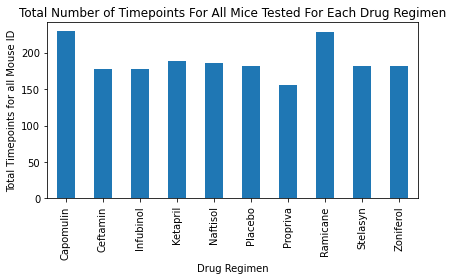

In [87]:
mouse_unique.groupby(["Drug Regimen"])["Mouse ID" and "Timepoint"].count().plot(kind='bar',
                                                                              ylabel='Total Timepoints for all Mouse ID',
                                                                             title='Total Number of Timepoints For All Mice Tested For Each Drug Regimen')
plt.tight_layout()
#plt.savefig("plots/DataFrame Bar Chart - Total Timepoints For All Mice Tested For Each Drug Regimen.pdf")
# MATCHES CALCULATIONS PER Drug Regimen!!
# USES .plot(kind='bar',...)

In [88]:
# NOT CORRECT!  # PLUS "Mouse ID", "Timepoint" returns deprecation message
# mouse_unique.groupby(["Drug Regimen"])["Mouse ID", "Timepoint"].count().plot(kind='bar', ylabel="Timepoint")

In [89]:
# NOT CORRECT!  # PLUS "Mouse ID" or "Timepoint" does not return deprecation message
# mouse_unique.groupby(["Drug Regimen"])["Mouse ID" or "Timepoint"].count().plot(kind='bar', ylabel="Mouse ID")

In [90]:
# NOT CORRECT! 
# mouse_unique.groupby(["Drug Regimen"])["Mouse ID"].count().plot(kind='bar')

In [91]:
# NOT CORRECT! 
# mouse_unique.groupby(["Drug Regimen"])["Timepoint"].sum().plot(kind='bar')

### ANOTHER WAY:

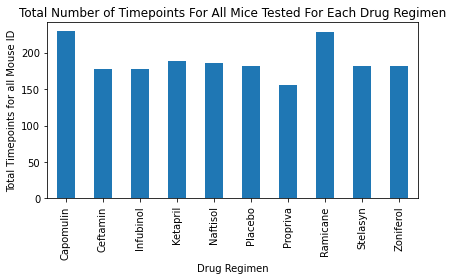

In [92]:
mouse_unique.groupby(["Drug Regimen"])["Mouse ID" and
                                       "Timepoint"].count().plot.bar("Drug Regimen",
                                                                   ylabel="Total Timepoints for all Mouse ID",
                                                                  title='Total Number of Timepoints For All Mice Tested For Each Drug Regimen')
plt.tight_layout()
#plt.savefig("plots/DataFrame Bar Chart2 - Total Timepoints For All Mice Tested For Each Drug Regimen",transparent=True)
#plt.savefig("plots/DataFrame Bar Chart2 - Total Timepoints For All Mice Tested For Each Drug Regimen.pdf")


In [93]:
# NOT CORRECT! # Shows y scale based on Timepoint 0 - 45
# mouse_unique[["Timepoint", "Drug Regimen", "Mouse ID"]].plot.bar("Drug Regimen", "Timepoint")

In [94]:
# NOT CORRECT! # Shows y scale based on Timepoint 0 - 45
# mouse_unique[["Timepoint","Mouse ID", "Drug Regimen"]].plot(kind='bar', x='Drug Regimen', y='Timepoint')

In [95]:
# NOT CORRECT! # Shows y scale based on Timepoint 0 - 45
# mouse_unique.plot(kind='bar', x='Drug Regimen', y='Timepoint', figsize=(10,8))

## Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

In [96]:
dmt_group = mouse_unique[["Drug Regimen", "Mouse ID", "Timepoint"]]
#type(dmt_group)

In [97]:
#dmt_group = dmt_group.set_index("Drug Regimen")
#dmt_group

In [98]:
dmt = dmt_group.groupby("Drug Regimen")
#type(dmt)
dmt.head(10)

,Drug Regimen,Mouse ID,Timepoint
0,Infubinol,a203,0
1,Infubinol,a203,5
2,Infubinol,a203,10
3,Infubinol,a203,15
4,Infubinol,a203,20
...,...,...,...
305,Ketapril,c580,10
306,Ketapril,c580,15
307,Ketapril,c580,20
308,Ketapril,c580,25


In [99]:
dmt_time = dmt["Timepoint"].count()
dmt_time

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

In [100]:
drug_names = dmt["Drug Regimen"].unique().apply(list)
#drug_names = dmt["Drug Regimen"].count()
#dmt_group = dmt_group.reset_index()

#drugs = drug_names.unique()
drug_names

Drug Regimen
Capomulin    [Capomulin]
Ceftamin      [Ceftamin]
Infubinol    [Infubinol]
Ketapril      [Ketapril]
Naftisol      [Naftisol]
Placebo        [Placebo]
Propriva      [Propriva]
Ramicane      [Ramicane]
Stelasyn      [Stelasyn]
Zoniferol    [Zoniferol]
Name: Drug Regimen, dtype: object

In [101]:
dmt_group.head()

,Drug Regimen,Mouse ID,Timepoint
0,Infubinol,a203,0
1,Infubinol,a203,5
2,Infubinol,a203,10
3,Infubinol,a203,15
4,Infubinol,a203,20


In [102]:
dmt_group.value_counts()

Drug Regimen  Mouse ID  Timepoint
Capomulin     b128      0            1
Propriva      t198      15           1
              v991      0            1
              u946      20           1
                        15           1
                                    ..
Ketapril      f278      5            1
                        0            1
              d474      40           1
                        35           1
Zoniferol     x613      15           1
Length: 1888, dtype: int64

In [103]:
test_drug = dmt_group.iloc[:, 2]
#test_regimen = dmt_group.iloc[:, 1]
test_drug
#test_regimen.unique()

#drug_names
#type(drug_names)

0        0
1        5
2       10
3       15
4       20
        ..
1884    25
1885    30
1886    35
1887    40
1888    45
Name: Timepoint, Length: 1888, dtype: int64

In [104]:
#drug_names = dmt["Drug Regimen"].unique()
#drug_names

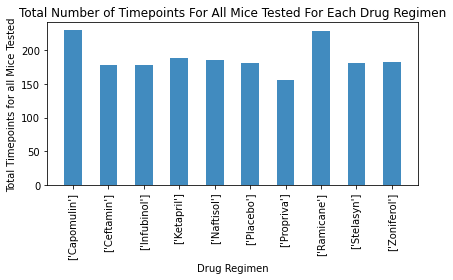

In [105]:


#drug_names = dmt["Drug Regimen"].unique()
# print(drugs)
#x_axis = np.arange(len(test_regimen))
x_axis = np.arange(len(drug_names))
#x_axis = np.arange(len(dmt["Drug Regimen"].unique()))
# x_axis
tick_locations = [value for value in x_axis]
#y_axis = np.arange(len(dmt_time))
# y_axis

plt.title("Total Number of Timepoints For All Mice Tested For Each Drug Regimen")
plt.ylabel("Total Timepoints for all Mice Tested")
#plt.xlabel("Drug Regimen")
plt.xlabel("Drug Regimen")
#plt.xticks(tick_locations, test_regimen, rotation='vertical')
plt.xticks(tick_locations, drug_names, rotation='vertical')
plt.bar(x_axis, dmt_time, align="center", width=0.5, alpha=0.85)

plt.tight_layout()
#plt.savefig("plots/pyplot Bar Chart - Total Timepoints For All Mice Tested For Each Drug Regimen.pdf")




## Generate a pie plot showing the distribution of female versus male mice using Pandas

In [106]:
mouse_unique.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Metastatic Sites  Tumor Volume (mm3)
a203      Infubinol     Female  20          23          0          0                 45.000000             1
q597      Ramicane      Male    20          25          40         2                 44.471821             1
q633      Zoniferol     Male    12          25          10         0                 49.001866             1
                                                        5          0                 47.183802             1
                                                        0          0                 45.000000             1
                                                                                                          ..
i334      Ramicane      Female  8           20          5          0                 41.020518             1
                                                        0          0                 45.000000             1
i177      Ramicane      

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#mouse_sex = mouse_unique.groupby(["Sex"])["Drug Regimen"].value_counts()
mouse_sex_per_drug_count = mouse_unique.groupby(["Sex","Drug Regimen"])["Sex" and "Drug Regimen"].count()
#mouse_sex.value_counts()
#mouse_sex.count()

mouse_sex_per_drug_count.head()
#total_mouse = mouse_unique["Sex"]
#total_mouse.count()
#total_mouse.dtype
#type(total_mouse)
#type(mouse_sex)#series
#mouse_sex.dtype#int64

Sex     Drug Regimen
Female  Capomulin       128
        Ceftamin         92
        Infubinol        95
        Ketapril         58
        Naftisol         86
Name: Drug Regimen, dtype: int64

In [108]:
# mouse_sex_per_drug_count = mouse_unique.groupby(["Sex","Drug Regimen"])["Sex" and "Drug Regimen"].count()

In [109]:
#sex_drugs = mouse_unique[["Sex", "Drug Regimen"]].value_counts()
#sex_drugs = mouse_unique.groupby(["Sex", "Drug Regimen"])["Mouse ID"].count()
sex_drugs = mouse_unique.groupby(["Sex"])["Sex" and "Drug Regimen"].count()
#sex_drugs.value_counts()
sex_drugs
#type(sex_drugs)#series
#sex_drugs.dtype#int64

Sex
Female    930
Male      958
Name: Drug Regimen, dtype: int64

In [110]:
def func(pct):
    return "{:1.1f}%".format(pct)

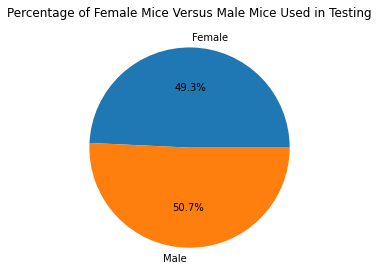

In [111]:
sex_drugs.plot.pie(title='Percentage of Female Mice Versus Male Mice Used in Testing', ylabel='',
                                 y="Percent Female", labels=["Female","Male"],
                                 autopct=lambda pct: func(pct))

plt.tight_layout()
#plt.savefig("plots/DataFrame Pie Chart - Percentage Female Mice Versus Male Mice used in Testing.pdf")



## I wanted to see what percentage of females were used for each drug regimen.

In [112]:
female = mouse_unique.loc[mouse_unique["Sex"] == "Female", ["Sex","Drug Regimen"]].value_counts()
#female.value_counts()
female
# female_group = female.groupby(["Drug Regimen"])
# female_group.head()
#type(female)#series
#female.dtype#int64

Sex     Drug Regimen
Female  Capomulin       128
        Zoniferol       119
        Stelasyn        107
        Placebo         102
        Infubinol        95
        Ceftamin         92
        Naftisol         86
        Ramicane         74
        Propriva         69
        Ketapril         58
dtype: int64

In [113]:
male = mouse_unique.loc[mouse_unique["Sex"] == "Male", ["Sex","Drug Regimen"]].value_counts()
male

Sex   Drug Regimen
Male  Ramicane        154
      Ketapril        130
      Capomulin       102
      Naftisol        100
      Propriva         87
      Ceftamin         86
      Infubinol        83
      Placebo          79
      Stelasyn         74
      Zoniferol        63
dtype: int64

In [114]:
tsex = mouse_unique.groupby(["Drug Regimen"], as_index=False)["Sex"].count()
tsex
#total_sex = female + male
#total_sex

,Drug Regimen,Sex
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


In [115]:
tsexc = mouse_unique.groupby(["Drug Regimen"], as_index=False)["Drug Regimen" , "Sex"].count()
tsexc

/var/folders/6t/7ljyhyps1g50vwwrjcwyl8bw0000gp/T/ipykernel_35463/95517809.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tsexc = mouse_unique.groupby(["Drug Regimen"], as_index=False)["Drug Regimen" , "Sex"].count()


,Drug Regimen,Sex
0,230,230
1,178,178
2,178,178
3,188,188
4,186,186
5,181,181
6,156,156
7,228,228
8,181,181
9,182,182


In [116]:
totalsex_count = (mouse_unique.groupby(["Drug Regimen","Sex"])["Sex"])
totalsex_count.count()
#totalsex_count.value_counts()

Drug Regimen  Sex   
Capomulin     Female    128
              Male      102
Ceftamin      Female     92
              Male       86
Infubinol     Female     95
              Male       83
Ketapril      Female     58
              Male      130
Naftisol      Female     86
              Male      100
Placebo       Female    102
              Male       79
Propriva      Female     69
              Male       87
Ramicane      Female     74
              Male      154
Stelasyn      Female    107
              Male       74
Zoniferol     Female    119
              Male       63
Name: Sex, dtype: int64

In [117]:
#percent_female = round(((female / tsex) * 100), 2)#worked when did not have as_index=True
#percent_female

In [118]:
#percent_male = round(((male / tsex) * 100), 2)#worked when did not have as_index=True
#percent_male

In [119]:
fmouse = mouse_unique.loc[(mouse_unique["Sex"] == "Female"), :]
fmouse.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Metastatic Sites  Tumor Volume (mm3)
a203      Infubinol     Female  20          23          0          0                 45.000000             1
r554      Capomulin     Female  8           17          0          0                 45.000000             1
q610      Ramicane      Female  18          21          15         0                 45.889028             1
                                                        20         0                 46.585433             1
                                                        25         0                 40.146450             1
                                                                                                          ..
i386      Infubinol     Female  23          29          20         2                 55.087724             1
                                                        25         3                 56.687864             1
                        

In [120]:
fmouse_group = fmouse.groupby(["Drug Regimen"], as_index=False)["Sex"].count()
fmouse_group.head()

,Drug Regimen,Sex
0,Capomulin,128
1,Ceftamin,92
2,Infubinol,95
3,Ketapril,58
4,Naftisol,86


In [121]:
mmouse = mouse_unique.loc[(mouse_unique["Sex"] == "Male"), :]
mmouse.head()
#mmouse.dtypes
#type(mmouse)#DataFrame

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
57,a411,Ramicane,Male,3,22,0,0,45.000000
58,a411,Ramicane,Male,3,22,5,0,45.466677
59,a411,Ramicane,Male,3,22,10,1,40.759788
60,a411,Ramicane,Male,3,22,15,1,41.484169
61,a411,Ramicane,Male,3,22,20,1,38.087373


In [122]:
mmm = mmouse[["Drug Regimen", "Sex"]]
mmm.head()

,Drug Regimen,Sex
57,Ramicane,Male
58,Ramicane,Male
59,Ramicane,Male
60,Ramicane,Male
61,Ramicane,Male


In [123]:
mmouse_group = mmouse.groupby(["Drug Regimen"], as_index=False)["Sex"].count()
mmouse_group.head()
#type(mmouse_group)#DataFrame

,Drug Regimen,Sex
0,Capomulin,102
1,Ceftamin,86
2,Infubinol,83
3,Ketapril,130
4,Naftisol,100


In [124]:
fmouse_percent = round(((fmouse_group["Sex"] / tsex["Sex"]) * 100), 2)
#type(fmouse_percent)
fmouse_percent.head()

0    55.65
1    51.69
2    53.37
3    30.85
4    46.24
Name: Sex, dtype: float64

In [125]:
fm_df = fmouse_percent.to_frame()
fm_df



,Sex
0,55.65
1,51.69
2,53.37
3,30.85
4,46.24
5,56.35
6,44.23
7,32.46
8,59.12
9,65.38


In [126]:
mmouse_percent = round(((mmouse_group["Sex"] / tsex["Sex"]) * 100), 2)
mmouse_percent


0    44.35
1    48.31
2    46.63
3    69.15
4    53.76
5    43.65
6    55.77
7    67.54
8    40.88
9    34.62
Name: Sex, dtype: float64

In [127]:
mm_df = mmouse_percent.to_frame()
mm_df

,Sex
0,44.35
1,48.31
2,46.63
3,69.15
4,53.76
5,43.65
6,55.77
7,67.54
8,40.88
9,34.62


In [128]:
#summary_sex = [{"Percent Female":fmouse_percent,
#               "Percent Male":mmouse_percent}]
#               "Total":tsex}]
#summary_sex
summary_percent = pd.DataFrame({"Percent Female": fmouse_percent, "Percent Male": mmouse_percent})
summary_percent.value_counts()
#summary_percent.sum()

Percent Female  Percent Male
30.85           69.15           1
32.46           67.54           1
44.23           55.77           1
46.24           53.76           1
51.69           48.31           1
53.37           46.63           1
55.65           44.35           1
56.35           43.65           1
59.12           40.88           1
65.38           34.62           1
dtype: int64

In [129]:
tsex

,Drug Regimen,Sex
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


In [130]:
drug_sex_percent_df = tsex.merge(summary_percent, left_index=True, right_index=True)

drug_sex_percent_df

,Drug Regimen,Sex,Percent Female,Percent Male
0,Capomulin,230,55.65,44.35
1,Ceftamin,178,51.69,48.31
2,Infubinol,178,53.37,46.63
3,Ketapril,188,30.85,69.15
4,Naftisol,186,46.24,53.76
5,Placebo,181,56.35,43.65
6,Propriva,156,44.23,55.77
7,Ramicane,228,32.46,67.54
8,Stelasyn,181,59.12,40.88
9,Zoniferol,182,65.38,34.62


In [131]:
drug_sex_percent_df.set_index("Drug Regimen")

,Sex,Percent Female,Percent Male
Drug Regimen,,,
Capomulin,230,55.65,44.35
Ceftamin,178,51.69,48.31
Infubinol,178,53.37,46.63
Ketapril,188,30.85,69.15
Naftisol,186,46.24,53.76
Placebo,181,56.35,43.65
Propriva,156,44.23,55.77
Ramicane,228,32.46,67.54
Stelasyn,181,59.12,40.88


In [132]:
drug_sex_percent_female = drug_sex_percent_df[["Drug Regimen", "Percent Female"]]
drug_sex_percent_female

,Drug Regimen,Percent Female
0,Capomulin,55.65
1,Ceftamin,51.69
2,Infubinol,53.37
3,Ketapril,30.85
4,Naftisol,46.24
5,Placebo,56.35
6,Propriva,44.23
7,Ramicane,32.46
8,Stelasyn,59.12
9,Zoniferol,65.38


In [133]:
sex_drug_percent_female = drug_sex_percent_df[["Percent Female", "Drug Regimen"]]
sex_drug_percent_female

,Percent Female,Drug Regimen
0,55.65,Capomulin
1,51.69,Ceftamin
2,53.37,Infubinol
3,30.85,Ketapril
4,46.24,Naftisol
5,56.35,Placebo
6,44.23,Propriva
7,32.46,Ramicane
8,59.12,Stelasyn
9,65.38,Zoniferol


In [134]:
sex_f = sex_drug_percent_female["Percent Female"].value_counts().index
sex_f
#test_sex


Float64Index([55.65, 51.69, 53.37, 30.85, 46.24, 56.35, 44.23, 32.46, 59.12,
              65.38],
             dtype='float64')

In [135]:
drug_f = sex_drug_percent_female["Drug Regimen"].value_counts().index
drug_f

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object')

In [136]:
#drug_sex_percent_female.set_index("Drug Regimen")
drug_sex_percent_female.reset_index()

,index,Drug Regimen,Percent Female
0,0,Capomulin,55.65
1,1,Ceftamin,51.69
2,2,Infubinol,53.37
3,3,Ketapril,30.85
4,4,Naftisol,46.24
5,5,Placebo,56.35
6,6,Propriva,44.23
7,7,Ramicane,32.46
8,8,Stelasyn,59.12
9,9,Zoniferol,65.38


In [137]:
drug_sex_percent_female["Percent Female"]

0    55.65
1    51.69
2    53.37
3    30.85
4    46.24
5    56.35
6    44.23
7    32.46
8    59.12
9    65.38
Name: Percent Female, dtype: float64

In [138]:
#female_percent = round(((female / tsex) * 100), 2)#worked when did not have as_index=True
#female_percent
#type(female_percent)
#f_per = female_percent.unique()
#f_per

In [139]:
#male_percent = round(((male / tsex) * 100), 2)#worked when did not have as_index=True
#male_percent
#m_per = male_percent.unique()
#m_per

In [140]:
#drugs = drug_sex_percent_female["Drug Regimen"].unique()
#type(drugs)

In [141]:
drugs = drug_sex_percent_female["Drug Regimen"].unique()
drugs

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [142]:
drugs_test = drug_sex_percent_female.iloc[:,0]
#type(drugs_test)#Series
drugs_test

0    Capomulin
1     Ceftamin
2    Infubinol
3     Ketapril
4     Naftisol
5      Placebo
6     Propriva
7     Ramicane
8     Stelasyn
9    Zoniferol
Name: Drug Regimen, dtype: object

In [143]:
drug_sex_percent_female["Drug Regimen"]

0    Capomulin
1     Ceftamin
2    Infubinol
3     Ketapril
4     Naftisol
5      Placebo
6     Propriva
7     Ramicane
8     Stelasyn
9    Zoniferol
Name: Drug Regimen, dtype: object

In [144]:
label = drug_sex_percent_female["Percent Female"].unique()
type(label)
label


array([55.65, 51.69, 53.37, 30.85, 46.24, 56.35, 44.23, 32.46, 59.12,
       65.38])

In [145]:
drug_sex_percent_female.dtypes

Drug Regimen       object
Percent Female    float64
dtype: object

In [146]:
#drug_sex_percent_female["Percent Female"].astype(object)

In [147]:
#label = drug_sex_percent_female["Percent Female"].unique().astype(object)
#label.dtype
#label

In [148]:
label1 = drug_sex_percent_female["Percent Female"].value_counts()
#type(label)#Series
lab = label1.index
#label
#type(lab)
#type(label)#Series
label1

55.65    1
51.69    1
53.37    1
30.85    1
46.24    1
56.35    1
44.23    1
32.46    1
59.12    1
65.38    1
Name: Percent Female, dtype: int64

In [149]:
label_test = drug_sex_percent_female.iloc[:,1].value_counts()
#type(label_test)#Series
label_test

55.65    1
51.69    1
53.37    1
30.85    1
46.24    1
56.35    1
44.23    1
32.46    1
59.12    1
65.38    1
Name: Percent Female, dtype: int64

In [150]:
#drug_sex_percent_female.astype(object)

In [151]:
#drug_sex_percent_female.dtypes

In [152]:
#def func(pct):
#    return "{:1.1f}%".format(pct)

In [153]:
#def func(pct1, allvals):
#    return "{:.1f}%\n({:d} g)".format(pct1, allvals)

### Keep getting percent female as labels with autopercent for size of each wedge corresponding to drug.

### Want percent female as labels but text inside each wedge to be drug name.

<AxesSubplot:title={'center':'Percentage of Female Mice Used For Each Drug Regimen'}>

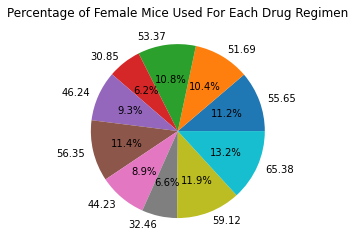

In [154]:
drug_sex_percent_df.plot.pie(title='Percentage of Female Mice Used For Each Drug Regimen', ylabel='',
                                 y="Percent Female", labels=drug_sex_percent_female["Percent Female"],
                                 autopct=lambda pct: func(pct),
                                 legend=None)


<AxesSubplot:title={'center':'Percentage of Female Mice Used For Each Drug Regimen'}>

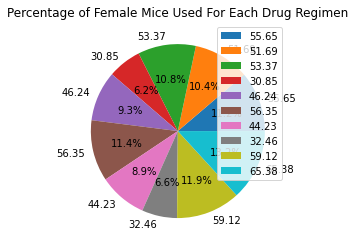

In [155]:
drug_sex_percent_female.plot.pie(title='Percentage of Female Mice Used For Each Drug Regimen', ylabel='',
                                 y="Percent Female", labels=drug_sex_percent_female["Percent Female"],
                                 autopct=lambda pct: func(pct),
                                 legend="Drug Regimen")

<AxesSubplot:title={'center':'Percentage of Female Mice Used For Each Drug Regimen'}>

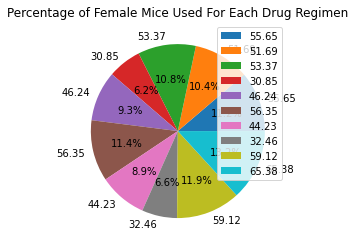

In [156]:
drug_sex_percent_female.plot.pie(title='Percentage of Female Mice Used For Each Drug Regimen', ylabel='',
                                 y="Percent Female", labels=drug_sex_percent_female["Percent Female"],
                                 autopct=lambda pct: func(pct),
                                 legend="Drug Regimen")

<AxesSubplot:title={'center':'Percentage of Female Mice Used For Each Drug Regimen'}>

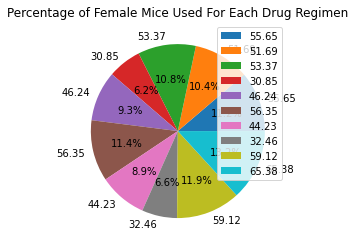

In [157]:
drug_sex_percent_df.plot.pie(title='Percentage of Female Mice Used For Each Drug Regimen', ylabel='',
                                 y="Percent Female", labels=drug_sex_percent_df["Percent Female"],
                                 autopct=lambda pct: func(pct),
                                 legend="Drug Regimen")

<AxesSubplot:title={'center':'Just Percent Female Mice Shown'}, ylabel='Percent Female'>

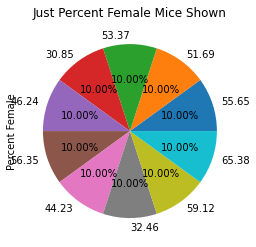

In [158]:
label_test.plot.pie(label="Percent Female", title="Just Percent Female Mice Shown", autopct='%2.2f%%')

array([<AxesSubplot:ylabel='Sex'>], dtype=object)

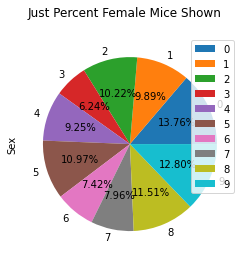

In [159]:
fmouse_group.plot.pie(y="Sex", title="Just Percent Female Mice Shown", autopct='%2.2f%%', subplots=True)

### Really want the following with drug names as labels, but want percentage female to be within wedges.

<AxesSubplot:title={'center':'Percentage of Female Mice Used For Each Drug Regimen'}>

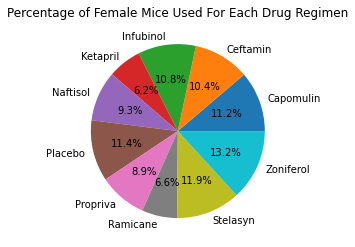

In [160]:
drug_sex_percent_female.plot.pie(y="Percent Female", labels=drug_sex_percent_female["Drug Regimen"],
                                 title='Percentage of Female Mice Used For Each Drug Regimen',
                                 ylabel='',
                                 autopct=lambda pct: func(pct),
                                 legend=None)

<AxesSubplot:title={'center':'Percentage of Female Mice Used For Each Drug Regimen'}>

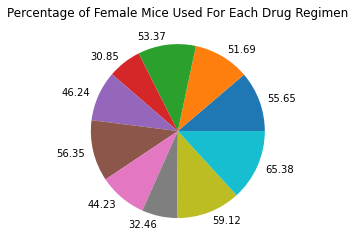

In [161]:
sex_drug_percent_female.plot.pie(y="Percent Female", labels=sex_f,
                                 title='Percentage of Female Mice Used For Each Drug Regimen',
                                 ylabel='',
                                 autopct=None,
                                 legend=None)

array([<AxesSubplot:>], dtype=object)

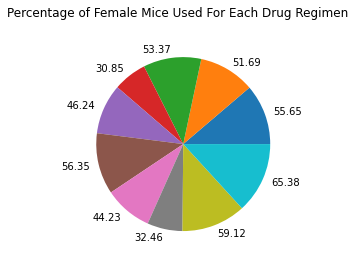

In [162]:
sex_drug_percent_female.plot.pie(x=drug_f, subplots=True, y="Percent Female", labels=sex_f,
                                 title='Percentage of Female Mice Used For Each Drug Regimen',
                                 ylabel='',
                                 autopct=None,
                                 legend=None)

<AxesSubplot:title={'center':'Percentage of Female Mice Used For Each Drug Regimen'}>

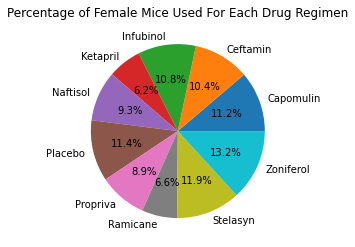

In [163]:
drug_sex_percent_female.plot.pie(y="Percent Female", labels=drugs,
                                 title='Percentage of Female Mice Used For Each Drug Regimen',
                                 ylabel='',
                                 autopct=lambda pct: func(pct),
                                 legend=None)

In [164]:
label

type(label)
#print(label)

numpy.ndarray

In [165]:
drugs

type(drugs)


numpy.ndarray

### Finally did this exploded pie which helps tell the story better.

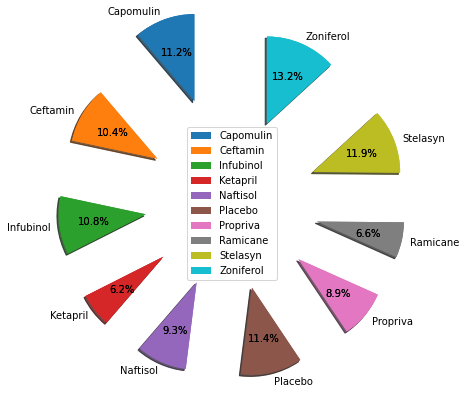

In [166]:
fig1, ax1 = plt.subplots()
explode = (1.25,1,1,1,1,1,1,1,1,1)
sizes = label
labels = drugs_test

ax1.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)

patches, texts, auto = ax1.pie(sizes, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )

plt.legend(patches, labels, loc="best")
plt.show()



### This is the best I could get without doing a nested pie chart (a donut).
### Each wedge shows a drug regimen with its percentage of overall testing.
### The legend color matches the drug regimen and shows the percentage female mice used in testing of each drug.

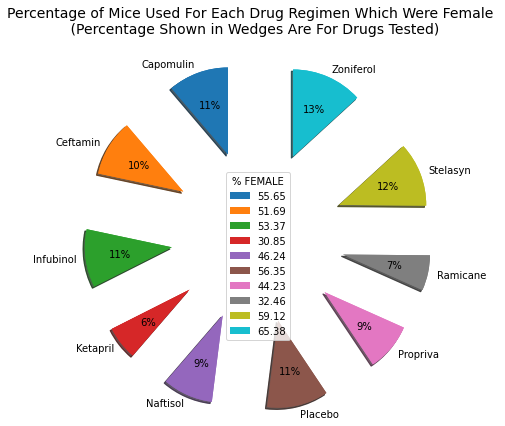

In [167]:
fig1, ax1 = plt.subplots()
explode = (1,1,1,1,1,1,1,1,1,1)
sizes = label
labels = label

ax1.pie(sizes, explode=explode, labels=drugs_test, shadow=True, startangle=90)
patches, texts, auto= ax1.pie(sizes, shadow=True, startangle=90, autopct='%0.0f%%', explode=explode)

plt.legend(patches, labels, loc="best", title="% FEMALE")

#ax1.set_title("Percentage of Female Mice Used For Each Drug Regimen")

fig1.suptitle("Percentage of Mice Used For Each Drug Regimen Which Were Female \n (Percentage Shown in Wedges Are For Drugs Tested)", y=1.30, fontsize=14)

#plt.tight_layout()#doesn't work well with exploded pie
#fig1 = plt.figure(figsize=(5,7))#doesn't work
#fig1.set_figheight(5)
#fig1.set_figwidth(6)
#plt.savefig("plots/pyplot exploded Pie Chart - Percentage Female Mice Used For Each Drug Regimen Testing.pdf")


plt.show()

## Generate a pie plot showing the distribution of female versus male mice using pyplot


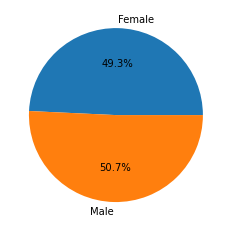

In [168]:

data_set = sex_drugs
#y="Percent Female"
my_labels = ["Female","Male"]
plt.pie(data_set, labels = my_labels, autopct=lambda pct: func(pct))
plt.show()

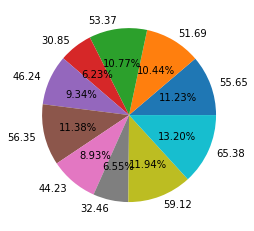

In [169]:
from matplotlib.pyplot import pie, show
from numpy import array
frac = label
data_set = label
my_labels = label
pie(data_set, labels = my_labels, autopct='%2.2f%%')
show()

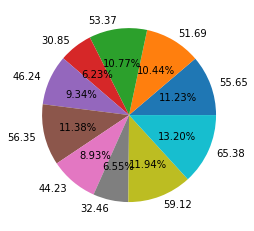

In [170]:
data_set = label
my_labels = label
plt.pie(data_set, labels = my_labels, autopct='%2.2f%%')
plt.show()

<AxesSubplot:title={'center':'Percentage of Female Mice Used For Each Drug Regimen'}>

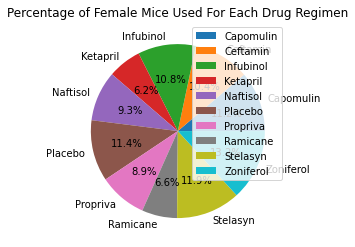

In [171]:
drug_sex_percent_female.plot.pie(y="Percent Female", labels=drug_sex_percent_female["Drug Regimen"],
                                 title='Percentage of Female Mice Used For Each Drug Regimen',
                                 ylabel='',
                                 autopct=lambda pct: func(pct),
                                 legend="Drug Regimen")

## Quartiles, Outliers and Boxplots

#### Calculate the final tumor volume of each mouse across four of the treatment regimens:
#### Capomulin, Ramicane, Infubinol, and Ceftamin

In [172]:
mouse_unique

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
0,a203,Infubinol,Female,20,23,0,0,45.000000
1,a203,Infubinol,Female,20,23,5,0,48.508468
2,a203,Infubinol,Female,20,23,10,1,51.852437
3,a203,Infubinol,Female,20,23,15,1,52.777870
4,a203,Infubinol,Female,20,23,20,1,55.173336
...,...,...,...,...,...,...,...,...
1884,z969,Naftisol,Male,9,30,25,2,63.145652
1885,z969,Naftisol,Male,9,30,30,3,65.841013
1886,z969,Naftisol,Male,9,30,35,4,69.176246
1887,z969,Naftisol,Male,9,30,40,4,70.314904


In [173]:
final_tumor = mouse_unique.groupby(["Tumor Volume (mm3)", "Mouse ID", "Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].max()
final_tumor

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,22.050126
1,s185,Capomulin,23.343598
2,k403,Ramicane,24.365505
3,s185,Capomulin,25.472143
4,k403,Ramicane,26.546993
...,...,...,...
1883,t724,Naftisol,75.113288
1884,m269,Stelasyn,75.123690
1885,p189,Ketapril,75.294936
1886,l725,Naftisol,76.668817


In [174]:
final_tumor2 = mouse_unique.groupby(["Tumor Volume (mm3)"],
                                    as_index=False).max()
final_tumor2

,Tumor Volume (mm3),Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites
0,22.050126,k403,Ramicane,Male,21,16,45,1
1,23.343598,s185,Capomulin,Female,3,17,45,1
2,24.365505,k403,Ramicane,Male,21,16,40,1
3,25.472143,s185,Capomulin,Female,3,17,40,1
4,26.546993,k403,Ramicane,Male,21,16,35,1
...,...,...,...,...,...,...,...,...
1635,75.113288,t724,Naftisol,Female,2,25,45,2
1636,75.123690,m269,Stelasyn,Female,22,28,45,1
1637,75.294936,p189,Ketapril,Male,8,28,45,4
1638,76.668817,l725,Naftisol,Female,8,26,45,3


#### Start by getting the last (greatest) timepoint for each mouse
#### df final_time gives greatest timepoint and largest volume for each mouse
#### df mouse_greatest gives largest volume of tumor for each mouse in specific drug regimens
#### wrong assumption
#### even though 100 rows which should be correct it is oriented toward largest volume
#### 100 rows = final timepoint (=25 - one for each mouse per drug regimen) X 4 drugs
## need to do steps used for mouse_greatest but with Timepoint instead of Tumor Volume (mm3)

In [175]:
final_time = mouse_unique.groupby(["Mouse ID", "Drug Regimen"], as_index=False)[["Timepoint", "Tumor Volume (mm3)"]].max()
final_time
#KEY!!!!  DOUBLE SQUARE BRACKETS CLEARS "USE LIST INSTEAD" ERROR!!!


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a262,Placebo,45,70.717621
3,a275,Ceftamin,45,62.999356
4,a366,Stelasyn,30,63.440686
...,...,...,...,...
244,z435,Propriva,10,48.710661
245,z578,Ramicane,45,45.000000
246,z581,Infubinol,45,62.754451
247,z795,Naftisol,45,65.741070


In [176]:
unique_mouse_Capomulin = mouse_unique.loc[mouse_unique["Drug Regimen"] == "Capomulin"]
#unique_mouse_Capomulin #230 rows
#unique_mouse_Capomulin["Mouse ID"].nunique()#25 Mice
#get this from mouse_unique.groupby(["Drug Regimen"])["Mouse ID"].count() also
#unique_mouse_Capomulin
mouse_unique.groupby(["Drug Regimen"])["Mouse ID"].count()


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [177]:
pd.options.display.max_rows

60

In [178]:
final_time2 = mouse_unique.groupby(["Tumor Volume (mm3)", "Timepoint"],
                                   as_index=False).max().sort_values(ascending=False, by=["Tumor Volume (mm3)"])
final_time2
#KEY!!!!  DOUBLE SQUARE BRACKETS CLEARS "USE LIST INSTEAD" ERROR!!!

,Tumor Volume (mm3),Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Metastatic Sites
1639,78.567014,45,o331,Ketapril,Male,24,30,4
1638,76.668817,45,l725,Naftisol,Female,8,26,3
1637,75.294936,45,p189,Ketapril,Male,8,28,4
1636,75.123690,45,m269,Stelasyn,Female,22,28,1
1635,75.113288,45,t724,Naftisol,Female,2,25,2
...,...,...,...,...,...,...,...,...
4,26.546993,35,k403,Ramicane,Male,21,16,1
3,25.472143,40,s185,Capomulin,Female,3,17,1
2,24.365505,40,k403,Ramicane,Male,21,16,1
1,23.343598,45,s185,Capomulin,Female,3,17,1


In [179]:
final_time["Drug Regimen"].value_counts()

Infubinol    25
Placebo      25
Ceftamin     25
Zoniferol    25
Ramicane     25
Ketapril     25
Propriva     25
Naftisol     25
Capomulin    25
Stelasyn     24
Name: Drug Regimen, dtype: int64

In [180]:
# test output of Timepoint
mouse_unique.loc[mouse_unique["Mouse ID"]=="a203"]
# test checks out!

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
0,a203,Infubinol,Female,20,23,0,0,45.000000
1,a203,Infubinol,Female,20,23,5,0,48.508468
2,a203,Infubinol,Female,20,23,10,1,51.852437
3,a203,Infubinol,Female,20,23,15,1,52.777870
4,a203,Infubinol,Female,20,23,20,1,55.173336
5,a203,Infubinol,Female,20,23,25,1,56.793208
6,a203,Infubinol,Female,20,23,30,1,59.523197
7,a203,Infubinol,Female,20,23,35,2,61.931650
8,a203,Infubinol,Female,20,23,40,2,63.593490
9,a203,Infubinol,Female,20,23,45,2,67.973419


In [181]:
# test output#2 of Timepoint
mouse_unique.loc[mouse_unique["Mouse ID"]=="z969"]
# test checks out!

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
1879,z969,Naftisol,Male,9,30,0,0,45.000000
1880,z969,Naftisol,Male,9,30,5,0,49.332999
1881,z969,Naftisol,Male,9,30,10,1,52.656081
1882,z969,Naftisol,Male,9,30,15,2,54.713005
1883,z969,Naftisol,Male,9,30,20,2,57.898778
1884,z969,Naftisol,Male,9,30,25,2,63.145652
1885,z969,Naftisol,Male,9,30,30,3,65.841013
1886,z969,Naftisol,Male,9,30,35,4,69.176246
1887,z969,Naftisol,Male,9,30,40,4,70.314904
1888,z969,Naftisol,Male,9,30,45,4,73.867845


In [182]:
# test output#3 of Timepoint - WITH MOUSE ID = g989 with mouse_study when it had duplicates
mouse_study.loc[mouse_study["Mouse ID"]=="g989"]
# test checks out!  DUPLICATES SHOWING FOR Timepoints 0, 5, 10, 15, 20! #mouse_study has 1893 rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [183]:
# test output#3 of Timepoint - WITH MOUSE ID = g989 WHICH HAD DUPLICATES
mouse_unique.loc[mouse_unique["Mouse ID"]=="g989"]
# test checks out!  DUPLICATES STILL GONE!  #mouse_unique has 1888 rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
586,g989,Propriva,Female,21,26,0,0,45.000000
587,g989,Propriva,Female,21,26,5,0,48.786801
588,g989,Propriva,Female,21,26,10,0,51.745156
589,g989,Propriva,Female,21,26,15,0,53.442020
591,g989,Propriva,Female,21,26,20,1,55.326122
592,g989,Propriva,Female,21,26,25,1,56.045564
593,g989,Propriva,Female,21,26,30,1,59.082294
594,g989,Propriva,Female,21,26,35,2,62.570880


#### Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#### df specific_treatments gives last timepoint at largest volume for all mice used in specific drug regimen

In [184]:
#.groupby(["Tumor Volume (mm3)","Timepoint"],as_index=False).max().sort_values(ascending=False,by=["Tumor Volume (mm3)"])


In [185]:
specific_treatments = final_time.loc[(lambda final_time: (final_time["Drug Regimen"] == "Capomulin") |
                                      (final_time["Drug Regimen"] == "Ramicane") |
                                      (final_time["Drug Regimen"] == "Infubinol") |
                                      (final_time["Drug Regimen"] == "Ceftamin")), :]
#specific_treatments #100 ROWS - 100 different mice, 10 different timepoints, 4 different drugs, 
#specific_treatments["Tumor Volume (mm3)"].value_counts()
#specific_treatments.duplicated(keep=False) #none=True

# idea from https://stackoverflow.com/questions/61250615/how-do-you-use-loc-in-pandas-with-more-than-one-condition


In [186]:
specific_treatments2 = final_time2.loc[(lambda final_time2: (final_time2["Drug Regimen"] == "Capomulin") |
                                      (final_time2["Drug Regimen"] == "Ramicane") |
                                      (final_time2["Drug Regimen"] == "Infubinol") |
                                      (final_time2["Drug Regimen"] == "Ceftamin")), :].groupby(["Tumor Volume (mm3)","Timepoint"],
                                                                                               as_index=False).max().sort_values(ascending=False,by=["Tumor Volume (mm3)"])
#specific_treatments2.duplicated(keep=False)# none=true
specific_treatments2.groupby(["Drug Regimen"])["Mouse ID"].count()
#DON'T MATCH WITH mouse_unique.groupby(["Drug Regimen"])["Mouse ID"].count()
#should be 230, 178, 178, 228
#instead get 205, 153, 153, 203
#problem is final_time dataframes!!!

# idea from https://stackoverflow.com/questions/61250615/how-do-you-use-loc-in-pandas-with-more-than-one-condition
#specific_treatments this way gives 714 rows - #NEED TO FIND OUT HOW MANY MICE WERE USED ON THESE 4 DRUGS


Drug Regimen
Capomulin    205
Ceftamin     153
Infubinol    153
Ramicane     203
Name: Mouse ID, dtype: int64

In [187]:
mouse_unique.groupby(["Drug Regimen"])["Mouse ID"].count()
#mouse_unique.groupby(["Mouse ID"])["Drug Regimen"].count()#this gives how many times each mouse is used on each drug

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [188]:
specific_treatments3 = final_time2.loc[(lambda final_time2: (final_time2["Drug Regimen"] == "Capomulin") |
                                      (final_time2["Drug Regimen"] == "Ramicane") |
                                      (final_time2["Drug Regimen"] == "Infubinol") |
                                      (final_time2["Drug Regimen"] == "Ceftamin")), :]
#specific_treatments3
# THIS GIVES 714 ROWS - CONFIRM UNIQUE MOUSE ID
#specific_treatments3["Mouse ID"].unique() #only 96 unique mice
specific_treatments3.groupby(["Drug Regimen"])["Mouse ID"].count()

Drug Regimen
Capomulin    205
Ceftamin     153
Infubinol    153
Ramicane     203
Name: Mouse ID, dtype: int64

In [189]:
specific_treatments4 = mouse_unique.loc[(lambda mouse_unique: (mouse_unique["Drug Regimen"] == "Capomulin") |
                                      (mouse_unique["Drug Regimen"] == "Ramicane") |
                                      (mouse_unique["Drug Regimen"] == "Infubinol") |
                                      (mouse_unique["Drug Regimen"] == "Ceftamin")), :]
specific_treatments4  #814 rows
#specific_treatments4.groupby(["Drug Regimen"])["Mouse ID"].count()
#should be 230, 178, 178, 228
#now get 230, 178, 178, 228
#USE THIS ONE!!!

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
0,a203,Infubinol,Female,20,23,0,0,45.000000
1,a203,Infubinol,Female,20,23,5,0,48.508468
2,a203,Infubinol,Female,20,23,10,1,51.852437
3,a203,Infubinol,Female,20,23,15,1,52.777870
4,a203,Infubinol,Female,20,23,20,1,55.173336
...,...,...,...,...,...,...,...,...
1864,z581,Infubinol,Female,24,25,25,2,54.316407
1865,z581,Infubinol,Female,24,25,30,2,56.286750
1866,z581,Infubinol,Female,24,25,35,3,58.628399
1867,z581,Infubinol,Female,24,25,40,3,60.053740


In [190]:
#specific_treatments["Drug Regimen"].value_counts()# 25 rows for each of 4 drug regimen
#specific_treatments["Mouse ID"].value_counts()# 100 mice
#specific_treatments["Tumor Volume (mm3)"].value_counts()# 79 tumor volumes - 22 are 45.000, then unique
#spec_treat_time = specific_treatments["Timepoint"].value_counts()# 63 are timepoint 45

In [191]:
specific_treatments4.count()

Mouse ID              814
Drug Regimen          814
Sex                   814
Age_months            814
Weight (g)            814
Timepoint             814
Metastatic Sites      814
Tumor Volume (mm3)    814
dtype: int64

In [192]:
specific_treatments4.groupby(["Drug Regimen"])["Mouse ID"].count()# .sum() is 814

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ramicane     228
Name: Mouse ID, dtype: int64

In [193]:
spec_treat_time = specific_treatments4["Drug Regimen"].unique()
spec_treat_time

array(['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'], dtype=object)

In [194]:
mouse_Ramicane = specific_treatments4.loc[specific_treatments4["Drug Regimen"] == "Ramicane"].sort_values(ascending=False,
                                                                                      by=["Tumor Volume (mm3)"])
mouse_Ramicane

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
1507,u196,Ramicane,Male,18,25,30,2,47.622816
1504,u196,Ramicane,Male,18,25,15,1,47.227171
1508,u196,Ramicane,Male,18,25,35,2,47.001465
323,c758,Ramicane,Male,9,17,15,1,46.940945
110,a644,Ramicane,Female,7,17,15,0,46.910892
...,...,...,...,...,...,...,...,...
1415,s508,Ramicane,Male,1,17,45,0,30.276232
581,g791,Ramicane,Male,11,16,45,1,29.128472
803,k403,Ramicane,Male,21,16,35,1,26.546993
804,k403,Ramicane,Male,21,16,40,1,24.365505


In [195]:
mouse_Ramicane["Mouse ID"].nunique()

25

In [196]:
mouse_Ramicane_unique = mouse_Ramicane.drop_duplicates(subset=["Mouse ID"], keep='first')
mouse_Ramicane_unique

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
1507,u196,Ramicane,Male,18,25,30,2,47.622816
323,c758,Ramicane,Male,9,17,15,1,46.940945
110,a644,Ramicane,Female,7,17,15,0,46.910892
1261,q610,Ramicane,Female,18,21,20,0,46.585433
446,e662,Ramicane,Male,8,24,10,0,46.409084
1798,y449,Ramicane,Male,19,24,10,0,46.378092
768,j989,Ramicane,Male,8,19,10,1,46.343832
573,g791,Ramicane,Male,11,16,5,0,45.851531
1248,q597,Ramicane,Male,20,25,5,0,45.766111
287,c458,Ramicane,Female,23,20,5,0,45.722279


In [197]:
dup_Ramicane = mouse_Ramicane["Mouse ID"].duplicated(keep='first')
dup_Ramicane

1507    False
1504     True
1508     True
323     False
110     False
        ...  
1415     True
581      True
803      True
804      True
805      True
Name: Mouse ID, Length: 228, dtype: bool

In [198]:
Ramicane_test = mouse_Ramicane.groupby(["Tumor Volume (mm3)", "Timepoint"]).nunique()
Ramicane_test

,,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Metastatic Sites
Tumor Volume (mm3),Timepoint,,,,,,
22.050126,45,1,1,1,1,1,1
24.365505,40,1,1,1,1,1,1
26.546993,35,1,1,1,1,1,1
29.128472,45,1,1,1,1,1,1
30.276232,45,1,1,1,1,1,1
...,...,...,...,...,...,...,...
46.910892,15,1,1,1,1,1,1
46.940945,15,1,1,1,1,1,1
47.001465,35,1,1,1,1,1,1


In [199]:
mouse_Ramicane.groupby(["Drug Regimen"])["Mouse ID"].nunique() #.count()

Drug Regimen
Ramicane    25
Name: Mouse ID, dtype: int64

In [200]:
mouse_greatest = specific_treatments4.loc[specific_treatments4.groupby(["Mouse ID"])["Timepoint"].idxmax()]
#mouse_greatest# gives 100 Rows

#mouse_greatest.count() # gives 100 for each column
# code idea from: https://stackoverflow.com/questions/43899886/how-do-i-just-keep-the-rows-with-the-maximum-value-in-a-column-for-items-of-the

mouse_greatest.nunique()

Mouse ID              100
Drug Regimen            4
Sex                     2
Age_months             23
Weight (g)             16
Timepoint              10
Metastatic Sites        5
Tumor Volume (mm3)     97
dtype: int64

In [201]:
mouse_greatest
# USE THIS ONE FOR THE REST!!!

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
9,a203,Infubinol,Female,20,23,45,2,67.973419
19,a251,Infubinol,Female,21,25,45,1,65.525743
39,a275,Ceftamin,Female,20,28,45,3,62.999356
66,a411,Ramicane,Male,3,22,45,1,38.407618
76,a444,Ramicane,Female,10,25,45,0,43.047543
...,...,...,...,...,...,...,...,...
1821,y769,Ceftamin,Female,6,27,45,4,68.594745
1831,y793,Capomulin,Male,17,17,45,2,31.896238
1841,y865,Ceftamin,Male,23,26,45,3,64.729837
1858,z578,Ramicane,Male,11,16,45,0,30.638696


In [202]:
pd.io.clipboards.to_clipboard(mouse_greatest.sort_values(by="Drug Regimen").to_markdown(index=False), excel=False)

In [203]:
from pandas.io.clipboards import to_clipboard
#pd.io.clipboards.to_clipboard(mouse_greatest[["Mouse ID",
#                                              "Tumor Volume (mm3)",
#                                              "Timepoint",
#                                              "Drug Regimen"]].sort_values(by="Drug Regimen").to_markdown(index=False), excel=False)

In [204]:
#mouse_greatest[["Mouse ID", "Tumor Volume (mm3)", "Timepoint", "Drug Regimen"]].to_markdown(tablefmt="grid")
# the pd.io.clipboards is better since it puts it in your clipboard so you can paste directly to Markdown file
# both require pip install tabulate


In [205]:
#mouse_greatest2 = specific_treatments4.groupby(["Tumor Volume (mm3)", "Timepoint"]).max()
#mouse_greatest2
# did not work - returned 715 rows

In [206]:
#mouse_greatest3 = specific_treatments4.loc[((lambda specific_treatments4: (specific_treatments4["Tumor Volume (mm3)"].max()))
#                                            and ((lambda specific_treatments4: specific_treatments4["Timepoint"].max()))), :]
#mouse_greatest3  
# did not work

In [207]:
#mouse_specific = pd.merge(specific_treatments, mouse_unique, how="left", on=["Mouse ID", "Drug Regimen",
#                                                                             "Timepoint", "Tumor Volume (mm3)" ])
#mouse_specific
# Will not work.  Get proper number of rows=100 but many NaN

In [208]:
# test output#1 to check NaN values
#mouse_unique.loc[mouse_unique["Mouse ID"]=="a411"]
# there were no NaN so the how="left" did not work; although, there were the proper number of rows

In [209]:
#mouse_unique.dtypes
#To confirm dtypes are not causing any issues

In [210]:
#mouse_rearranged = mouse_unique[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)",
#                                "Sex", "Age_months", "Weight (g)", "Metastatic Sites"]]
#mouse_rearranged
#Did not help be rearranging columns.  Still get NaN.

In [211]:
#specific_treatments.dtypes

In [212]:
#mouse_specific = pd.merge(specific_treatments, mouse_rearranged, how="left", on=["Mouse ID",
#                                                                      "Drug Regimen","Timepoint",
#                                                                      "Tumor Volume (mm3)"])
#mouse_specific
#Will not work! Get 100 rows but still get many NaN.

In [213]:
# this merge is just to show only half as many columns, but no NaN when let merge happen automatically
# it is the same as how="inner", on=["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]
# get only 50 rows
#mouse_specific = pd.merge(specific_treatments, mouse_unique)
#mouse_specific

In [214]:
#mouse_specific.info()
#specific_treatments.info()
#mouse_unique.info()

In [215]:
mouse_treatments = mouse_unique.loc[(lambda mouse_unique: (mouse_unique["Drug Regimen"] == "Capomulin") |
                                      (mouse_unique["Drug Regimen"] == "Ramicane") |
                                      (mouse_unique["Drug Regimen"] == "Infubinol") |
                                      (mouse_unique["Drug Regimen"] == "Ceftamin")), :].groupby(["Tumor Volume (mm3)",
                                                                                                 "Timepoint"],
                                                                                                as_index=False).max().sort_values(ascending=False,
                                                                                                                                  by=["Tumor Volume (mm3)"])
mouse_treatments
# takes from 1888 rows to 814 rows with just specific Drug Regimen
#Now try merge again.

,Tumor Volume (mm3),Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Metastatic Sites
714,72.226731,45,c139,Infubinol,Male,11,28,2
713,69.428141,40,c139,Infubinol,Male,11,28,2
712,68.923185,45,k210,Ceftamin,Male,15,28,3
711,68.594745,45,y769,Ceftamin,Female,6,27,4
710,67.973419,45,a203,Infubinol,Female,20,23,2
...,...,...,...,...,...,...,...,...
4,26.546993,35,k403,Ramicane,Male,21,16,1
3,25.472143,40,s185,Capomulin,Female,3,17,1
2,24.365505,40,k403,Ramicane,Male,21,16,1
1,23.343598,45,s185,Capomulin,Female,3,17,1


In [216]:
mouse_treatments.sort_values(by=["Drug Regimen"])

,Tumor Volume (mm3),Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Metastatic Sites
135,37.950355,20,b742,Capomulin,Male,7,21,0
298,43.688449,15,w914,Capomulin,Male,24,21,0
167,38.846876,45,l897,Capomulin,Male,17,19,1
297,43.688026,10,s710,Capomulin,Female,1,23,0
295,43.571703,30,s710,Capomulin,Female,1,23,1
...,...,...,...,...,...,...,...,...
208,40.375138,10,n364,Ramicane,Male,4,17,0
206,40.330935,15,i177,Ramicane,Male,10,18,0
204,40.258818,40,a411,Ramicane,Male,3,22,1
233,41.395660,15,q597,Ramicane,Male,20,25,0


In [217]:
mouse_treatments["Drug Regimen"].value_counts()

Capomulin    205
Ramicane     204
Infubinol    153
Ceftamin     153
Name: Drug Regimen, dtype: int64

In [218]:
test_loc_mouse = mouse_treatments.loc[mouse_treatments["Drug Regimen"] == "Ramicane"].sort_values(ascending=False,
                                                                                      by=["Tumor Volume (mm3)",
                                                                                         "Timepoint"]).head(25)
test_loc_mouse

,Tumor Volume (mm3),Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Metastatic Sites
451,47.622816,30,u196,Ramicane,Male,18,25,2
440,47.227171,15,u196,Ramicane,Male,18,25,1
433,47.001465,35,u196,Ramicane,Male,18,25,2
431,46.940945,15,c758,Ramicane,Male,9,17,1
430,46.910892,15,a644,Ramicane,Female,7,17,0
415,46.705325,25,u196,Ramicane,Male,18,25,1
413,46.585433,20,q610,Ramicane,Female,18,21,0
407,46.422943,10,u196,Ramicane,Male,18,25,1
404,46.409084,10,e662,Ramicane,Male,8,24,0
402,46.380713,10,a644,Ramicane,Female,7,17,0


In [219]:
mouse_specific = pd.merge(specific_treatments, mouse_treatments, how="left")
mouse_specific
# Still get NaN but get 100 rows

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Sex,Age_months,Weight (g),Metastatic Sites
0,a203,Infubinol,45,67.973419,Female,20.0,23.0,2.0
1,a251,Infubinol,45,65.525743,Female,21.0,25.0,1.0
2,a275,Ceftamin,45,62.999356,Female,20.0,28.0,3.0
3,a411,Ramicane,45,45.466677,NaN,NaN,NaN,NaN
4,a444,Ramicane,45,45.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,45,68.594745,Female,6.0,27.0,4.0
96,y793,Capomulin,45,45.000000,NaN,NaN,NaN,NaN
97,y865,Ceftamin,45,64.729837,Male,23.0,26.0,3.0
98,z578,Ramicane,45,45.000000,NaN,NaN,NaN,NaN


In [220]:
#mouse_tumor = mouse_treatments.groupby(["Tumor Volume (mm3)", "Timepoint"],
#                                       as_index=False).max().sort_values(by=["Drug Regimen",
#                                                                             "Tumor Volume (mm3)",
#                                                                             "Timepoint",]).tail(100)
#mouse_tumor
# Does not give correct results even though output is 100 rows

In [221]:
# To get complete mouse_greatest DataFrame into clipboard and sorted on Drug Regimen
#pd.io.clipboards.to_clipboard(mouse_greatest.sort_values(by="Drug Regimen").to_markdown(index=False), excel=False)

In [222]:
mouse_tumor = mouse_treatments.groupby(["Tumor Volume (mm3)" or "Timepoint"],
                                       as_index=False).max().sort_values(ascending=False, by=["Tumor Volume (mm3)",
                                                                             "Timepoint",])
mouse_tumor

,Tumor Volume (mm3),Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Metastatic Sites
714,72.226731,45,c139,Infubinol,Male,11,28,2
713,69.428141,40,c139,Infubinol,Male,11,28,2
712,68.923185,45,k210,Ceftamin,Male,15,28,3
711,68.594745,45,y769,Ceftamin,Female,6,27,4
710,67.973419,45,a203,Infubinol,Female,20,23,2
...,...,...,...,...,...,...,...,...
4,26.546993,35,k403,Ramicane,Male,21,16,1
3,25.472143,40,s185,Capomulin,Female,3,17,1
2,24.365505,40,k403,Ramicane,Male,21,16,1
1,23.343598,45,s185,Capomulin,Female,3,17,1


In [223]:
#mouse_tumor = mouse_treatments.sort_values("Timepoint").groupby("Tumor Volume (mm3)", as_index=False).first()
#mouse_tumor
# Did not work - still 715 rows

In [224]:
mouse_timepoint = mouse_tumor.groupby(["Timepoint", "Tumor Volume (mm3)"]).max()
mouse_timepoint

Mouse ID Drug Regimen     Sex  Age_months  \
Timepoint Tumor Volume (mm3)                                             
0         45.000000              z581     Ramicane    Male          24   
5         36.321346              c326    Infubinol  Female          18   
          38.711872              s508     Ramicane    Male           1   
          38.723707              a520     Ramicane    Male          13   
          38.796474              f966    Capomulin    Male          16   
...                               ...          ...     ...         ...   
45        67.748662              l471     Ceftamin  Female           7   
          67.973419              a203    Infubinol  Female          20   
          68.594745              y769     Ceftamin  Female           6   
          68.923185              k210     Ceftamin    Male          15   
          72.226731              c139    Infubinol    Male          11   

                              Weight (g)  Metastatic Sites  
Timepoint Tumor Volume (mm3)                                
0         45.000000                   30                 0  
5         36.321346                   25                 0  
          38.711872                   17                 0  
          38.723707                   21                 0  
          38.796474                   17                 0  
...                                  ...               ...  
45        67.748662                   28                 1  
          67.973419                   23                 2  
          68.594745                   27                 4  
          68.923185                   28                 3  
          72.226731                   28                 2  

[715 rows x 6 columns]

In [225]:
#mouse_unique_final = mouse_treatments.loc[(mouse_treatments["Timepoint"].max()) or
#                                          (mouse_treatments["Tumor Volume (mm3)"].max())
#mouse_unique_final
# takes from 1888 rows to 814 rows with just specific Drug Regimen
#Now try merge again.

In [226]:
# Test: to see what groupby .max of both Timepoint and Tumor Volume (mm3) will give
#mouse_test_time_tumor = specific_treatments4.groupby(["Mouse ID", "Drug Regimen"], as_index=False)[["Timepoint", "Tumor Volume (mm3)"]].max()
#mouse_test_time_tumor
#pd.io.clipboards.to_clipboard(mouse_test_time_tumor.sort_values(by="Drug Regimen").to_markdown(index=False), excel=False)
# This gives 100 rows(perfect), but Tumor Volumes are greatest which was what first mouse_greatest dataframe had
# Tumor Volume values matched but Timepoints did not.  The Timepoints matched the mouse_greatest based on Timepoints.
# Try again with Tumor Volume in the first set of square brackets
#mouse_test_time_tumor = specific_treatments4.groupby(["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"], as_index=False)[["Timepoint"]].max()
#mouse_test_time_tumor
# Does not work.  Gives 814 rows.
# Try again with as_index=False turned off
# This worked.  100 rows (perfect).  Timepoints match.  Tumor Volume match.
### THIS WORKED.
#mouse_test_time_tumor = specific_treatments4.groupby(["Mouse ID", "Drug Regimen"])[["Timepoint", "Tumor Volume (mm3)"]].max()
#mouse_test_time_tumor.head()
### THIS WORKED
# Try again to get whole DataFrame by just doing .max on Timepoint, Tumor Volume in groupby paranthesis
#mouse_test_time_tumor = specific_treatments4.groupby(["Timepoint", "Tumor Volume (mm3)"]).max()
#mouse_test_time_tumor
# Does not work. Gives whole DataFrame but returns 715 rows.
# Try last time it worked but with setting index to (["Mouse ID", "Drug Regimen"]) first
#spec_treat4 = specific_treatments4.set_index(["Mouse ID", "Drug Regimen"])
#spec_treat4_sort = spec_treat4.sort_values(by=["Mouse ID","Drug Regimen"])
#spec_treat4_sort
### THIS DID NOT WORK (Tumor Volume values off)
#mouse_test_time_tumor = specific_treatments4.groupby(["Mouse ID", "Drug Regimen"])[["Timepoint", "Tumor Volume (mm3)"]].max()
#mouse_test_time_tumor
### THIS DID NOT WORK (Tumor Volume values off)
# Had to have .to_markdown(index=True) turned on, .sort_values(by="Drug Regimen") worked, also
#mouse_test_time_tumor.head()
#pd.io.clipboards.to_clipboard(mouse_test_time_tumor.sort_values(by=["Mouse ID","Drug Regimen"]).to_markdown(index=True), excel=False)


#pd.io.clipboards.to_clipboard(mouse_test_time_tumor.sort_values(by="Drug Regimen").to_markdown(index=False), excel=False)

#pd.io.clipboards.to_clipboard(mouse_test_time_tumor.sort_values(by="Drug Regimen").to_markdown(index=True), excel=False)




In [227]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_greatest = specific_treatments4.loc[specific_treatments4.groupby(["Mouse ID"])["Timepoint"].idxmax()].sort_values(by=["Drug Regimen", "Mouse ID"])
# Does work with .sort_values on end

#mouse_greatest = specific_treatments4.loc[specific_treatments4.groupby(["Mouse ID"])["Timepoint"].idxmax()]

mouse_greatest
#mouse_greatest_sorted = mouse_greatest.sort_values(by=["Drug Regimen", "Mouse ID"])
#mouse_greatest_sorted


#pd.io.clipboards.to_clipboard(mouse_test_time_tumor.sort_values(by="Drug Regimen").to_markdown(index=False), excel=False)
#pd.io.clipboards.to_clipboard(mouse_greatest_sorted.to_markdown(index=False), excel=False)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
183,b128,Capomulin,Female,9,22,45,2,38.982878
216,b742,Capomulin,Male,7,21,45,0,38.939633
499,f966,Capomulin,Male,16,17,20,0,30.485985
522,g288,Capomulin,Male,3,19,45,1,37.074024
542,g316,Capomulin,Female,22,22,45,2,40.159220
...,...,...,...,...,...,...,...,...
1415,s508,Ramicane,Male,1,17,45,0,30.276232
1510,u196,Ramicane,Male,18,25,45,3,40.667713
1678,w678,Ramicane,Female,5,24,5,0,43.166373
1799,y449,Ramicane,Male,19,24,15,0,44.183451


In [228]:
mouse_greatest["Drug Regimen"].unique()

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane'], dtype=object)

### Put treatments into a list for for loop (and later for plot labels)
## target_drugs list
target_drugs = [Capomulin_summary, Ceftamin_summary, Infubinol_summary, Ramicane_summary]

In [229]:
Capomulin_summary = mouse_greatest[mouse_greatest["Drug Regimen"] == "Capomulin"]
#Capomulin_summary
Ceftamin_summary = mouse_greatest[mouse_greatest["Drug Regimen"] == "Ceftamin"]
#Ceftamin_summary
Infubinol_summary = mouse_greatest[mouse_greatest["Drug Regimen"] == "Infubinol"]
#Infubinol_summary
Ramicane_summary = mouse_greatest[mouse_greatest["Drug Regimen"] == "Ramicane"]
#Ramicane_summary
target_drugs = [Capomulin_summary, Ceftamin_summary, Infubinol_summary, Ramicane_summary]
#Capomulin_summary
#target_drugs

### Create empty list to fill with tumor vol data (for plotting)
## tumor_vol_data list



In [230]:
tumor_vol = mouse_greatest[["Tumor Volume (mm3)", "Drug Regimen"]]
#type(tumor_vol)
tumor_vol.head()

,Tumor Volume (mm3),Drug Regimen
183,38.982878,Capomulin
216,38.939633,Capomulin
499,30.485985,Capomulin
522,37.074024,Capomulin
542,40.159220,Capomulin


In [231]:
#tumor_vol_data = []
#tumor_vol_data = [s["Tumor Volume (mm3)"]for s in target_drugs]
#tumor_vol_data
#print(tumor_vol_data)
tumor_data = tumor_vol.iloc[:, 0]
#tumor_data
drug_reg = tumor_vol.iloc[:, 1]
#drug_reg
tumor_drug_list = [tumor_data, drug_reg]


In [232]:
capo_summ = Capomulin_summary[["Tumor Volume (mm3)", "Drug Regimen"]]#.set_index("Tumor Volume (mm3)")
#capo_summ
ceft_summ = Ceftamin_summary[["Tumor Volume (mm3)", "Drug Regimen"]]#.set_index("Tumor Volume (mm3)")
#ceft_summ
infu_summ = Infubinol_summary[["Tumor Volume (mm3)", "Drug Regimen"]]#.set_index("Tumor Volume (mm3)")
#inful_summ
rami_summ = Ramicane_summary[["Tumor Volume (mm3)", "Drug Regimen"]]#.set_index("Tumor Volume (mm3)")
#rami_summary
target_drugs_vol = [capo_summ, ceft_summ, infu_summ, rami_summ]
#target_drugs_vol
#capo_summ
tdv_concat = pd.concat(target_drugs_vol)
tdv_concat.head()
#type(tdv_concat)
#for drug_regimen in tdv_concat:
#    tumor
#t_dat = []
#for drug_regimen in tdv_concat:
#    t_dat.append(tdv_concat["Tumor Volume (mm3)"])
#t_dat
#t_dat2 = tdv_concat["Tumor Volume (mm3)"]
#type(t_dat2)

,Tumor Volume (mm3),Drug Regimen
183,38.982878,Capomulin
216,38.939633,Capomulin
499,30.485985,Capomulin
522,37.074024,Capomulin
542,40.159220,Capomulin


### Calculate the IQR and quantitatively determine if there are any potential outliers. 



In [233]:
#Capomulin_summary.groupby("Tumor Volume (mm3)").quantile(.75, interpolation='higher')
#Capomulin_summary

In [234]:
#tumor_vol["Tumor Volume (mm3) Quartiles"]
#test_quart = pd.qcut(Capomulin_summary["Tumor Volume (mm3)"], 4, labels=["Q1", "Q2", "Q3", "Q4"])
#test_quart.sort_values()
Capomulin_summary.describe()

,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
count,25.000000,25.0000,25.00000,25.000000,25.000000
mean,14.040000,20.1200,41.00000,1.280000,36.667568
std,7.850053,2.8624,10.10363,0.979796,5.715188
min,1.000000,15.0000,10.00000,0.000000,23.343598
25%,7.000000,17.0000,45.00000,1.000000,32.377357
50%,17.000000,21.0000,45.00000,1.000000,38.125164
75%,21.000000,22.0000,45.00000,2.000000,40.159220
max,24.000000,25.0000,45.00000,3.000000,47.685963


<AxesSubplot:ylabel='Frequency'>

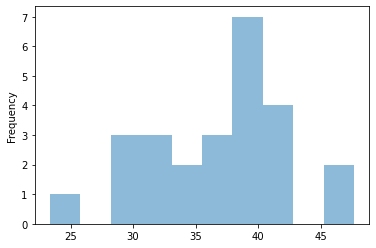

In [235]:
Capomulin_summary["Tumor Volume (mm3)"].plot.hist(alpha=0.5)

In [236]:
Capomulin_summary["Tumor Volume (mm3)"].describe()

count    25.000000
mean     36.667568
std       5.715188
min      23.343598
25%      32.377357
50%      38.125164
75%      40.159220
max      47.685963
Name: Tumor Volume (mm3), dtype: float64

In [237]:
Capomulin_summary["Tumor Volume (mm3)"].mode()

0     23.343598
1     28.430964
2     28.484033
3     30.485985
4     31.023923
5     31.896238
6     32.377357
7     33.329098
8     34.455298
9     36.041047
10    37.074024
11    37.311846
12    38.125164
13    38.753265
14    38.846876
15    38.939633
16    38.982878
17    39.952347
18    40.159220
19    40.658124
20    40.728578
21    41.483008
22    41.581521
23    46.539206
24    47.685963
dtype: float64

In [238]:
Capomulin_summary["Tumor Volume (mm3)"].median()

38.1251644

In [239]:
Tumor_Capo = Capomulin_summary["Tumor Volume (mm3)"].sort_values()
Tumor_Capo

1388    23.343598
995     28.430964
1725    28.484033
499     30.485985
1530    31.023923
1831    31.896238
1305    32.377357
1017    33.329098
1467    34.455298
1698    36.041047
522     37.074024
682     37.311846
702     38.125164
715     38.753265
945     38.846876
216     38.939633
183     38.982878
1610    39.952347
542     40.159220
1592    40.658124
1437    40.728578
891     41.483008
1356    41.581521
1295    46.539206
656     47.685963
Name: Tumor Volume (mm3), dtype: float64

In [240]:
Capo_quartiles = Capomulin_summary["Tumor Volume (mm3)"].quantile([.25, .50, .75])
lowerq_Capo = Capo_quartiles[.25]
upperq_Capo = Capo_quartiles[.75]
iqr_Capo = upperq_Capo - lowerq_Capo

In [241]:
lower_bound_Capo = lowerq_Capo - (1.5*iqr_Capo)
upper_bound_Capo = upperq_Capo + (1.5*iqr_Capo)

In [242]:
Capo_quartiles

0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64

In [243]:
lowerq_Capo

32.37735684

In [244]:
upperq_Capo

40.1592203

In [245]:
iqr_Capo

7.781863460000004

In [246]:
lower_bound_Capo

20.70456164999999

In [247]:
upper_bound_Capo

51.83201549

### Does not appear to be an outlier in Capomulin since all values for Tumor Volume (mm3) are within upper bounds and lower bounds

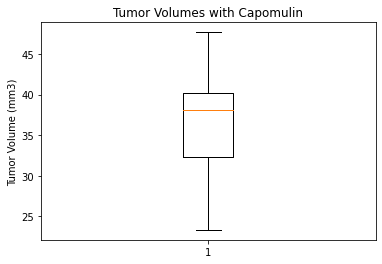

In [248]:
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volumes with Capomulin")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(Tumor_Capo)
plt.show()

In [249]:
quartiles = [s["Tumor Volume (mm3)"].quantile([.25,.50, .75]) for s in target_drugs_vol]
#quartiles = mouse_greatest["Tumor Volume (mm3)"].quantile([.25, .50, .75])
quartiles

[0.25    32.377357
 0.50    38.125164
 0.75    40.159220
 Name: Tumor Volume (mm3), dtype: float64,
 0.25    48.722078
 0.50    59.851956
 0.75    64.299830
 Name: Tumor Volume (mm3), dtype: float64,
 0.25    54.048608
 0.50    60.165180
 0.75    65.525743
 Name: Tumor Volume (mm3), dtype: float64,
 0.25    31.560470
 0.50    36.561652
 0.75    40.659006
 Name: Tumor Volume (mm3), dtype: float64]

In [250]:
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq - lowerq


In [251]:
tumor_vol1 = mouse_greatest[["Drug Regimen", "Tumor Volume (mm3)"]]
tumor_vol1.head()

,Drug Regimen,Tumor Volume (mm3)
183,Capomulin,38.982878
216,Capomulin,38.939633
499,Capomulin,30.485985
522,Capomulin,37.074024
542,Capomulin,40.159220


In [252]:
columns = []
columns = ["Drug Regimen", "Tumor Volume (mm3)"]

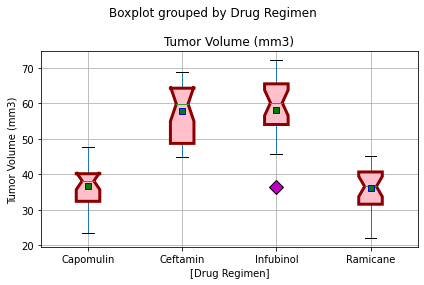

In [253]:
fig = plt.figure(tight_layout=True)
#ax = plt.subplot()
ax = fig.add_subplot()

fig.suptitle("Tumor Volumes", fontsize=14, fontweight='bold')

ax.set_title("Tumor Volumes by " +columns[0]+ "\n\n\n")
#ax.set_title('')

fig.subplots_adjust(top=0.85)

# info from: https://matplotlib.org/stable/tutorials/text/text_intro.html

ax.set_ylabel(columns[1])
ax.set_xlabel(columns[0])





#boxprops = dict(linewidth=3, color="darkgreen")
boxes = dict(linewidth=3, color="darkred", facecolor='pink')
magenta_diamond = dict(marker='D', markerfacecolor='m', markersize=10)
#flierprops = dict(marker='D', markerfacecolor='p', markersize=14)
#meanprops = dict(markeredgecolor='green', markerfacecolor='firebrick')
christmas_mean = dict(linewidth=3, marker='s', markeredgecolor='blue', markerfacecolor='green')

#tumor_vol1.boxplot(column=columns[1], by=columns[0], ax=ax, showmeans=True, flierprops=magenta_diamond,
#                  meanprops = christmas_mean)

tumor_vol1.boxplot(by=columns[0], ax=ax, notch='True', boxprops=boxes, flierprops=magenta_diamond,
                   meanprops=christmas_mean, showmeans=True, patch_artist=True, widths=0.25)
# settings info from: https://stackoverflow.com/questions/32161921/matplotlib-how-to-have-a-transparent-box-plot-face-while-a-non-transparent-line
# more custom fill colors from: https://matplotlib.org/stable/gallery/statistics/boxplot_color.html

#tumor_vol1.boxplot(by=columns[0], ax=ax)


plt.show()

In [254]:
Infubinol_summary.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
9,a203,Infubinol,Female,20,23,45,2,67.973419
19,a251,Infubinol,Female,21,25,45,1,65.525743
106,a577,Infubinol,Female,6,25,30,2,57.031862
126,a685,Infubinol,Male,8,30,45,3,66.083066
243,c139,Infubinol,Male,11,28,45,2,72.226731


In [255]:
Infubinol_summary.describe()

,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
count,25.000000,25.00000,25.000000,25.000000,25.000000
mean,16.400000,27.32000,30.600000,1.600000,58.178246
std,7.444237,2.17409,14.600228,1.224745,8.602957
min,1.000000,23.00000,5.000000,0.000000,36.321346
25%,11.000000,25.00000,20.000000,1.000000,54.048608
50%,19.000000,27.00000,30.000000,1.000000,60.165180
75%,23.000000,29.00000,45.000000,2.000000,65.525743
max,24.000000,30.00000,45.000000,4.000000,72.226731


In [256]:
Infu_quartiles = Infubinol_summary["Tumor Volume (mm3)"].quantile([.25, .50, .75])
lowerq_Infu = Infu_quartiles[.25]
upperq_Infu = Infu_quartiles[.75]
iqr_Infu = upperq_Infu - lowerq_Infu

In [257]:
lower_bound_Infu = lowerq_Infu - (1.5*iqr_Infu)
upper_bound_Infu = upperq_Infu + (1.5*iqr_Infu)

In [258]:
lowerq_Infu

54.04860769

In [259]:
upperq_Infu

65.52574285

In [260]:
Infu_quartiles

0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64

In [261]:
iqr_Infu

11.477135160000003

In [262]:
lower_bound_Infu

36.83290494999999

In [263]:
upper_bound_Infu

82.74144559000001

In [264]:
Tumor_Infu = Infubinol_summary["Tumor Volume (mm3)"].sort_values()
Tumor_Infu

275     36.321346
1136    45.699331
1553    46.250112
1007    47.010364
1633    50.005138
1577    51.542431
1569    54.048608
1219    54.656549
1134    55.629428
1362    55.650681
106     57.031862
1676    58.268442
1047    60.165180
477     60.918767
365     60.969711
838     62.117279
433     62.435404
1868    62.754451
19      65.525743
126     66.083066
815     66.196912
643     67.289621
1785    67.685569
9       67.973419
243     72.226731
Name: Tumor Volume (mm3), dtype: float64

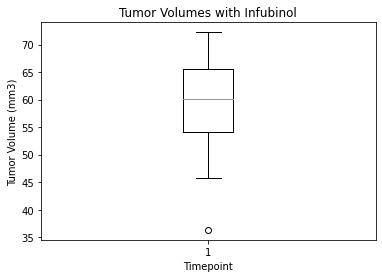

In [265]:
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volumes with Infubinol")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Timepoint")



ax1.boxplot(Tumor_Infu)
plt.show()

In [266]:
min_Infu = Infubinol_summary["Tumor Volume (mm3)"].sort_values(ascending=True).head()
min_Infu

275     36.321346
1136    45.699331
1553    46.250112
1007    47.010364
1633    50.005138
Name: Tumor Volume (mm3), dtype: float64

In [267]:
outlier_Infubinol = Infubinol_summary.loc[(Infubinol_summary["Tumor Volume (mm3)"] < lower_bound_Infu) |
                                         (Infubinol_summary["Tumor Volume (mm3)"] > upper_bound_Infu)]
outlier_Infubinol

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
275,c326,Infubinol,Female,18,25,5,0,36.321346


In [268]:
subset_Infubinol = Infubinol_summary.drop([275])
subset_Infubinol

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
9,a203,Infubinol,Female,20,23,45,2,67.973419
19,a251,Infubinol,Female,21,25,45,1,65.525743
106,a577,Infubinol,Female,6,25,30,2,57.031862
126,a685,Infubinol,Male,8,30,45,3,66.083066
243,c139,Infubinol,Male,11,28,45,2,72.226731
365,c895,Infubinol,Female,7,29,30,2,60.969711
433,e476,Infubinol,Male,23,26,45,1,62.435404
477,f345,Infubinol,Male,23,26,45,1,60.918767
643,i386,Infubinol,Female,23,29,40,4,67.289621
815,k483,Infubinol,Female,20,30,45,3,66.196912


In [269]:
min_subset = subset_Infubinol["Tumor Volume (mm3)"].sort_values(ascending=True).head()
min_subset

1136    45.699331
1553    46.250112
1007    47.010364
1633    50.005138
1577    51.542431
Name: Tumor Volume (mm3), dtype: float64

In [270]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [271]:
mouse_greatest.loc[mouse_greatest["Mouse ID"]=="c326"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
275,c326,Infubinol,Female,18,25,5,0,36.321346


In [272]:
mouse_greatest_subset = mouse_greatest.drop([275])

In [273]:
mouse_greatest_subset[["Drug Regimen", "Mouse ID"]].nunique()

Drug Regimen     4
Mouse ID        99
dtype: int64

In [274]:
tumor_vol2 = mouse_greatest_subset[["Drug Regimen", "Tumor Volume (mm3)"]]
tumor_vol2.head()

,Drug Regimen,Tumor Volume (mm3)
183,Capomulin,38.982878
216,Capomulin,38.939633
499,Capomulin,30.485985
522,Capomulin,37.074024
542,Capomulin,40.159220


In [275]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


### Generate a box plot of the final tumor volume of each mouse across four regimens of interest

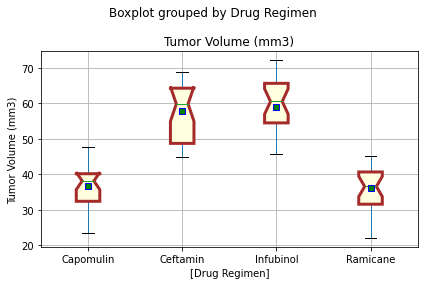

In [276]:
fig = plt.figure(tight_layout=True)
#ax = plt.subplot()
ax = fig.add_subplot()

fig.suptitle("Tumor Volumes", fontsize=14, fontweight='bold')

ax.set_title("Tumor Volumes by " +columns[0]+ "\n\n\n")
#ax.set_title('')

fig.subplots_adjust(top=0.85)

# info from: https://matplotlib.org/stable/tutorials/text/text_intro.html

ax.set_ylabel(columns[1])
ax.set_xlabel(columns[0])





#boxprops = dict(linewidth=3, color="darkgreen")
boxes = dict(linewidth=3, color="brown", facecolor='lightyellow')
magenta_diamond = dict(marker='D', markerfacecolor='m', markersize=10)
#flierprops = dict(marker='D', markerfacecolor='p', markersize=14)
#meanprops = dict(markeredgecolor='green', markerfacecolor='firebrick')
christmas_mean = dict(linewidth=3, marker='s', markeredgecolor='blue', markerfacecolor='green')

#tumor_vol2.boxplot(column=columns[1], by=columns[0], ax=ax, showmeans=True, flierprops=magenta_diamond,
#                  meanprops = christmas_mean)

tumor_vol2.boxplot(by=columns[0], ax=ax, notch='True', boxprops=boxes, flierprops=magenta_diamond,
                   meanprops=christmas_mean, showmeans=True, patch_artist=True, widths=0.25)
# settings info from: https://stackoverflow.com/questions/32161921/matplotlib-how-to-have-a-transparent-box-plot-face-while-a-non-transparent-line
# more custom fill colors from: https://matplotlib.org/stable/gallery/statistics/boxplot_color.html

#tumor_vol2.boxplot(by=columns[0], ax=ax)


plt.show()

## Line and Scatter Plots

In [277]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


### Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [278]:
Capomulin_time_tumor = Capomulin_summary[["Timepoint","Tumor Volume (mm3)"]]

In [279]:
capo_time_data = Capomulin_time_tumor.iloc[:, 0]
#capo_time_data
capo_tumor_data = Capomulin_time_tumor.iloc[:, 1]
#capo_tumor_data
capo_time_tumor_list = [capo_tumor_data, capo_time_data]
#capo_time_tumor_list
#tumor_vol_data = [s["Tumor Volume (mm3)"]for s in target_drugs]

In [280]:
#fig1, ax1 = plt.subplots()
#ax1.set_title("Tumor Volumes vs Timepoint with Capomulin")
#plt.ylabel("Tumor Volume (mm3)")
#plt.xlabel("Timepoint")
#handels = "Mouse ID"
#ax1.set_ylabel(columns[1])
#ax1.set_xlabel(columns[0])
#plt.legend(loc='best', fontsize="small")
#label.set_label("Mouse ID")
#ax.legend(loc='best', fontsize="small", handles=handels)
#Capomulin_mouse_unique.plot(label="Tumor Volume vs Timepoint")
#plt.show()

In [281]:
Capomulin_unique = mouse_unique.loc[mouse_unique["Drug Regimen"] == "Capomulin", :]
Capomulin_unique.nunique()

Mouse ID               25
Drug Regimen            1
Sex                     2
Age_months             15
Weight (g)              9
Timepoint              10
Metastatic Sites        4
Tumor Volume (mm3)    206
dtype: int64

In [282]:
Capomulin_mouse_unique = Capomulin_unique[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
Capomulin_mouse_unique

,Mouse ID,Timepoint,Tumor Volume (mm3)
174,b128,0,45.000000
175,b128,5,45.651331
176,b128,10,43.270852
177,b128,15,43.784893
178,b128,20,42.731552
...,...,...,...
1827,y793,25,38.992734
1828,y793,30,35.726023
1829,y793,35,36.327870
1830,y793,40,31.475411


In [283]:
Capomulin_mouse_g316 = Capomulin_unique.loc[Capomulin_unique["Mouse ID"] == "g316", ["Timepoint", "Tumor Volume (mm3)"]]
Capomulin_mouse_g316
                                            

,Timepoint,Tumor Volume (mm3)
533,0,45.000000
534,5,44.022752
535,10,44.502042
536,15,45.216743
537,20,45.933322
538,25,46.809225
539,30,44.221480
540,35,44.702833
541,40,45.565821
542,45,40.159220


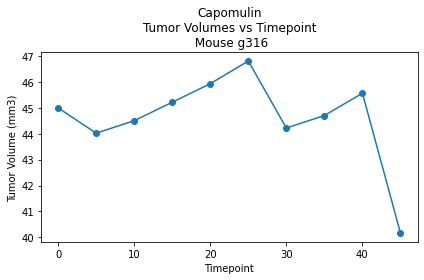

In [284]:
fig = plt.figure(tight_layout=True)
ax = fig.add_subplot()

plt.title("Capomulin\nTumor Volumes vs Timepoint\n Mouse g316")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

plt.plot(Capomulin_mouse_g316["Timepoint"], Capomulin_mouse_g316["Tumor Volume (mm3)"], marker='o')

plt.show()

In [285]:
#tumor_vol_data = [s["Tumor Volume (mm3)"]for s in target_drugs]

### Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



In [286]:
Capomulin_unique.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
174,b128,Capomulin,Female,9,22,0,0,45.000000
175,b128,Capomulin,Female,9,22,5,0,45.651331
176,b128,Capomulin,Female,9,22,10,0,43.270852
177,b128,Capomulin,Female,9,22,15,0,43.784893
178,b128,Capomulin,Female,9,22,20,0,42.731552


In [287]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_wt_vol = Capomulin_unique.groupby(["Mouse ID"])[["Tumor Volume (mm3)", "Weight (g)"]].mean()
Capomulin_wt_vol

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0
i557,44.805810,24.0
i738,39.141053,20.0
j119,44.465236,23.0
j246,43.216925,21.0


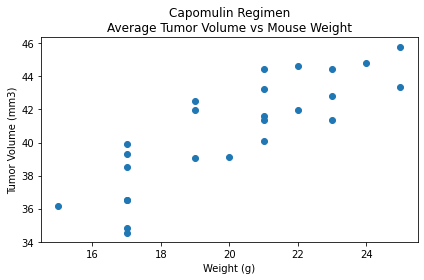

In [288]:
fig = plt.figure(tight_layout=True)
ax = fig.add_subplot()

plt.title("Capomulin Regimen\nAverage Tumor Volume vs Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

plt.scatter(Capomulin_wt_vol["Weight (g)"], Capomulin_wt_vol["Tumor Volume (mm3)"], marker='o')

plt.show()

In [289]:
capo_wt = Capomulin_wt_vol.iloc[:, 0]
capo_vol = Capomulin_wt_vol.iloc[:, 1]
#capo_wt
#capo_vol

In [290]:
from scipy import stats
tv_slope, tv_int, tv_r, tv_p, tv_std_err = stats.linregress(capo_wt, capo_vol)

In [291]:
capo_wt_fit = tv_slope * capo_wt + tv_int

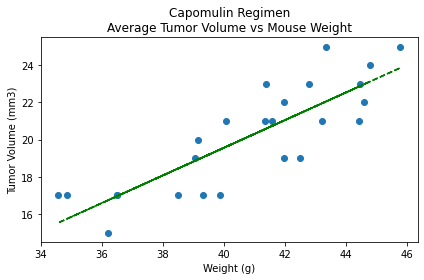

In [292]:
fig = plt.figure(tight_layout=True)
ax = fig.add_subplot()

plt.title("Capomulin Regimen\nAverage Tumor Volume vs Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

plt.scatter(capo_wt, capo_vol, marker='o')
plt.plot(capo_wt, capo_wt_fit, "g--")

plt.show()

In [293]:
print(tv_r)
print(tv_p)
print(tv_std_err)

0.8419363424694721
1.3225722434712404e-07
0.09924763572688554


## Correlation and Regression

### Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen



In [294]:
Capomulin_wt_vol.corr()
# r > 0.7 so strong correlation
# tv_r = 0.842

,Tumor Volume (mm3),Weight (g)
Tumor Volume (mm3),1.000000,0.841936
Weight (g),0.841936,1.000000
